The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. Hence the company gathered the dataset from the sale of houses.

The company wants to know:
* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house.

# EDA
## Univariate Analysis on Quantitative and Categorical variables

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import statsmodels.api as sm

In [2]:
house=pd.read_csv('../train.csv')

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
house.Id.nunique()

1460

In [8]:
house.set_index('Id',inplace=True)

## Missing values

In [9]:
round(house.isnull().sum().sort_values(ascending=False)/len(house)*100,2)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [10]:
## droping the columns as more than 80% of the data in missing in each columns 
house.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True) 

In [11]:
round(house.isnull().sum().sort_values(ascending=False)/len(house)*100,2)

FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
TotRmsAbvGrd      0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
Functional        0.00
MSSubClass        0.00
LowQualFinSF      0.00
GarageCars        0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
GrLivArea         0.00
HeatingQC         0.00
2ndFlrSF   

In [12]:
house.FireplaceQu.loc[house.FireplaceQu.isnull()]='OT' ## As this is actually one of the category NA replacing them as OT

col=['GarageType','GarageFinish','GarageCond','GarageQual']
house.loc[house.GarageType.isnull(),col]='OT' ## As this is actually one of the category NA replacing them as OT
house.GarageYrBlt.fillna(house.YearBuilt, inplace=True) ## As GarageYrBlt is for a reason as the houses dont have a garage hence imputing with yearbuilt 

house.loc[house.Electrical.isnull(),['Electrical']]='SBrkr' ## replacing with most common Electical type

In [13]:
house.loc[house.LotFrontage.isnull(),'LotFrontage']=house.LotFrontage.mean() ## replacing with mean value

In [14]:
 ## Category NA replacing them as OT
house.loc[house.BsmtFinType2.isnull(),['BsmtFinType2']]='OT'
house.loc[house.BsmtExposure.isnull(),['BsmtExposure']]='OT'
house.loc[house.BsmtFinType1.isnull(),['BsmtFinType1']]='OT'
house.loc[house.BsmtQual.isnull(),['BsmtQual']]='OT'
house.loc[house.BsmtCond.isnull(),['BsmtCond']]='OT'


In [15]:
 ## Category NA replacing them as OT
house.loc[house.MasVnrArea.isnull(),['MasVnrArea']]=0
house.loc[house.MasVnrType.isnull(),['MasVnrType']]='OT'

In [16]:
round(house.isnull().sum().sort_values(ascending=False)/len(house)*100,2)

MSSubClass       0.0
HalfBath         0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
FullBath         0.0
MSZoning         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
YearRemodAdd     0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood 

## Univariate Analysis

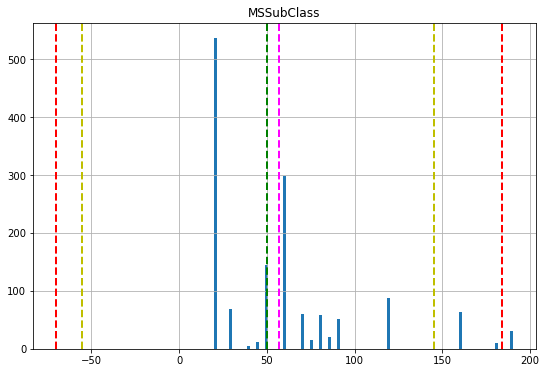

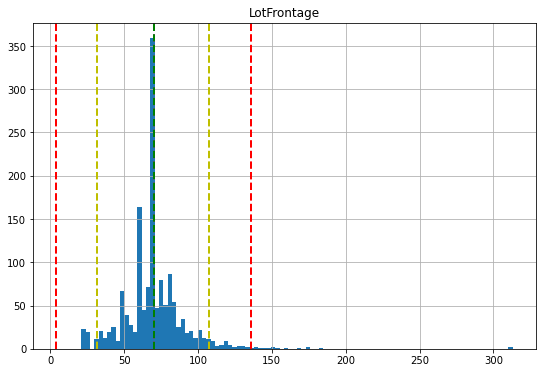

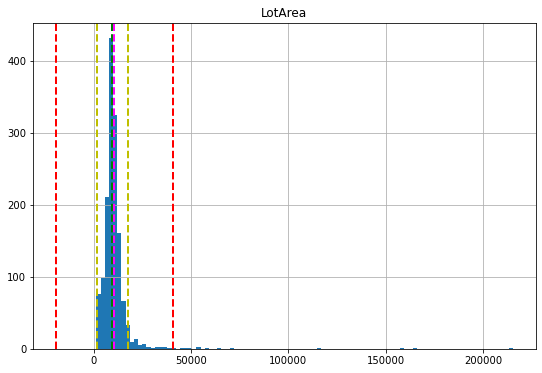

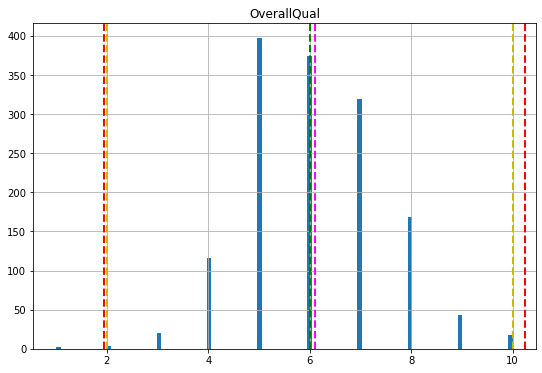

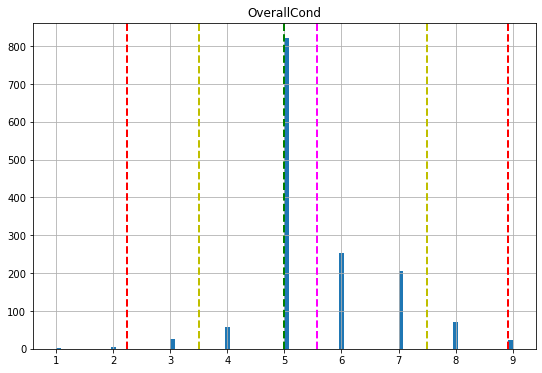

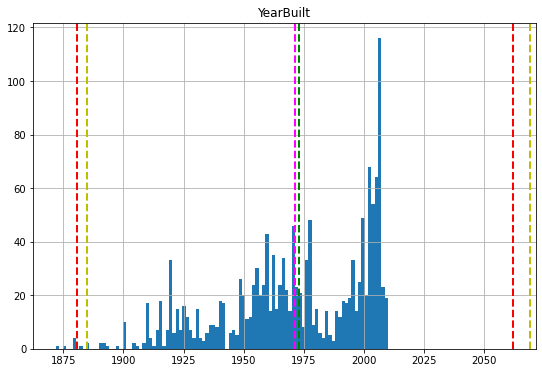

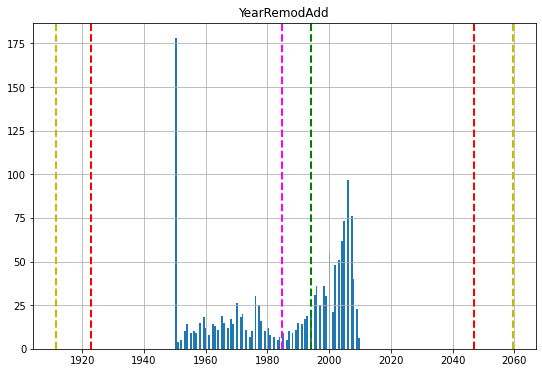

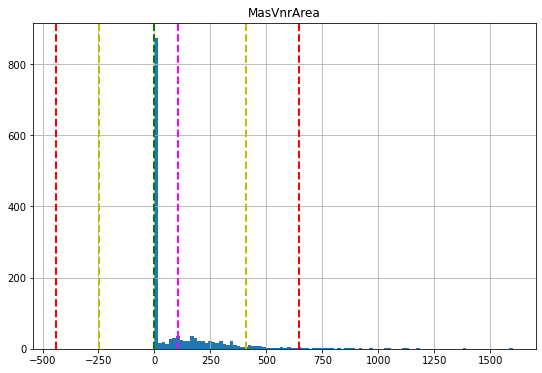

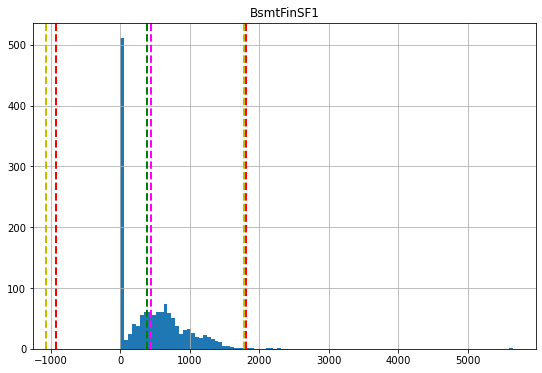

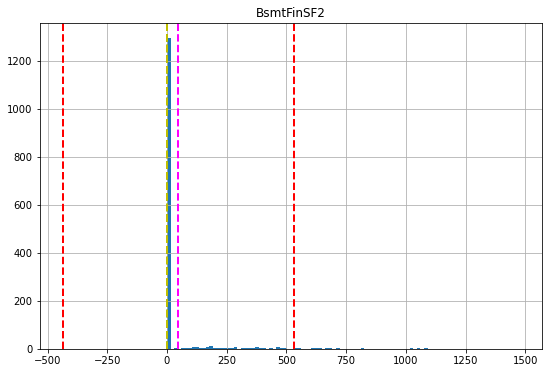

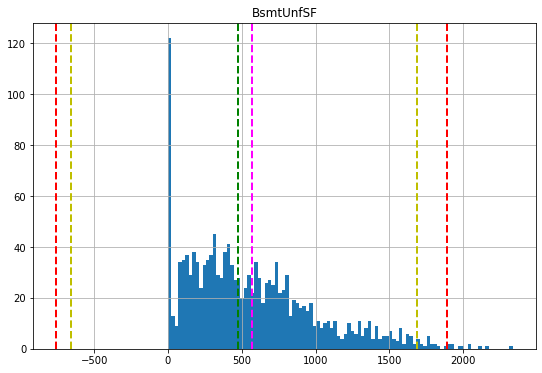

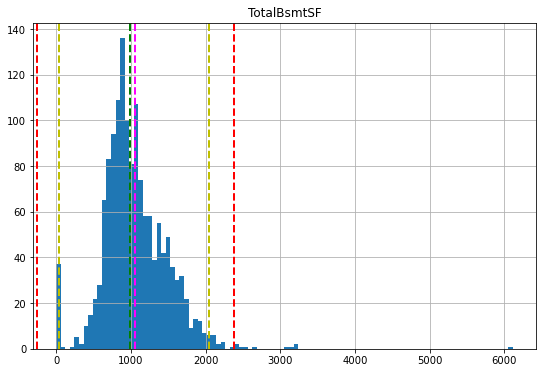

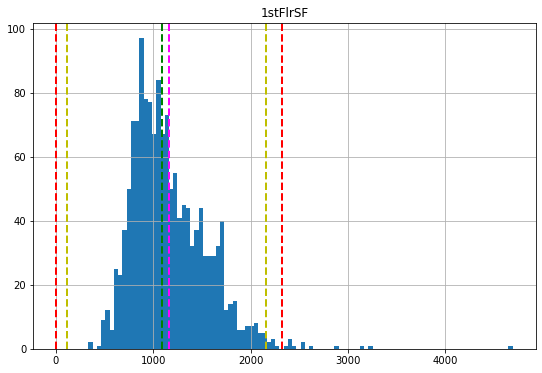

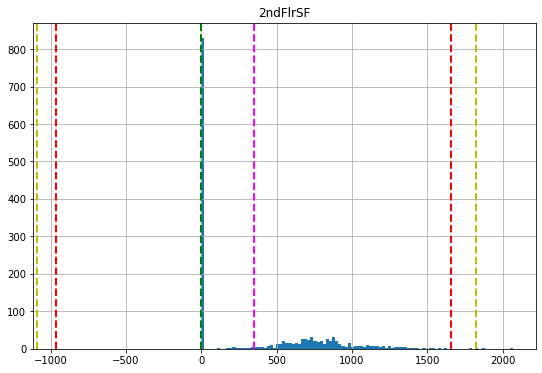

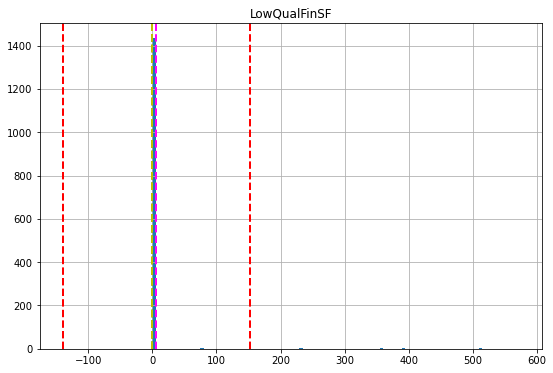

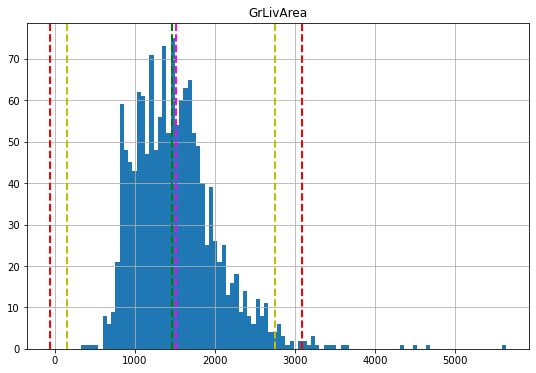

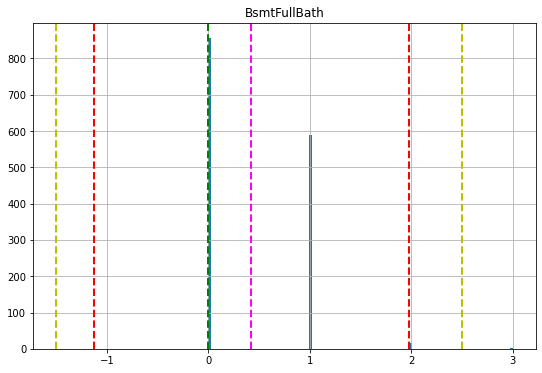

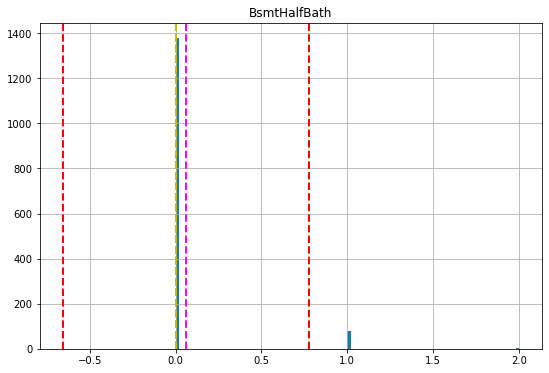

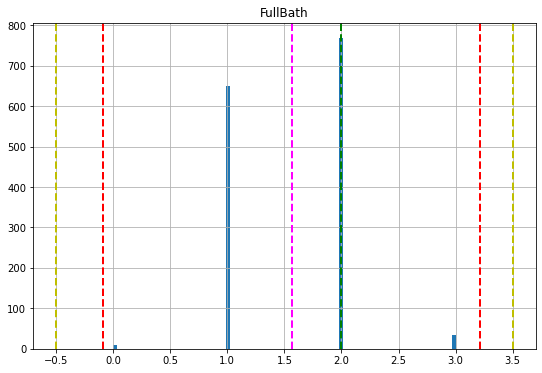

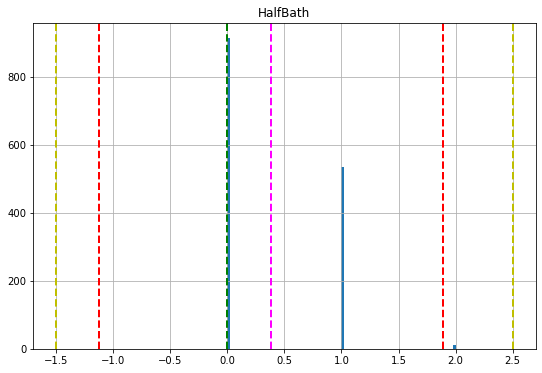

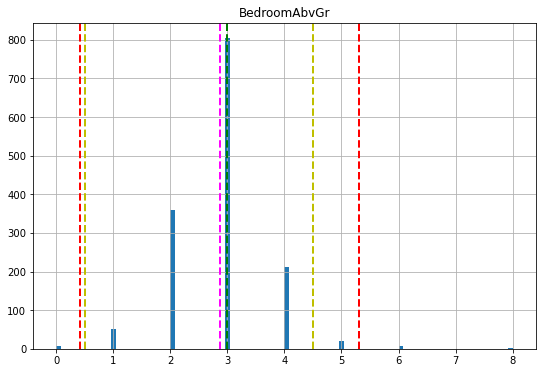

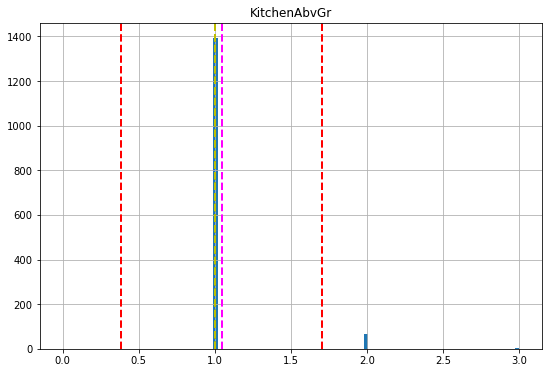

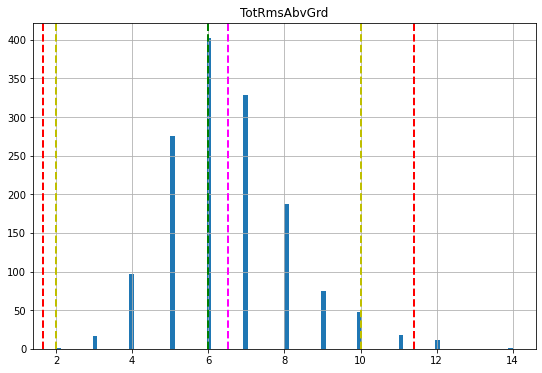

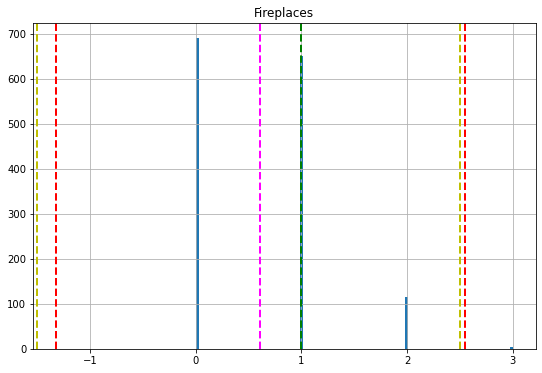

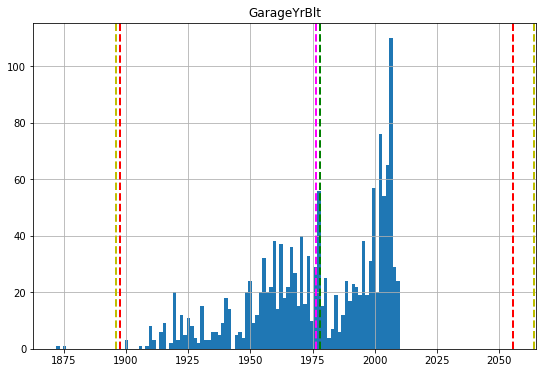

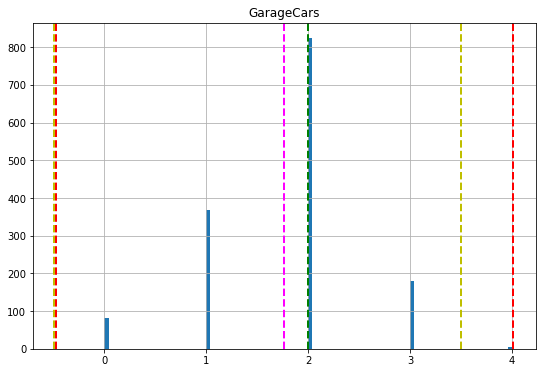

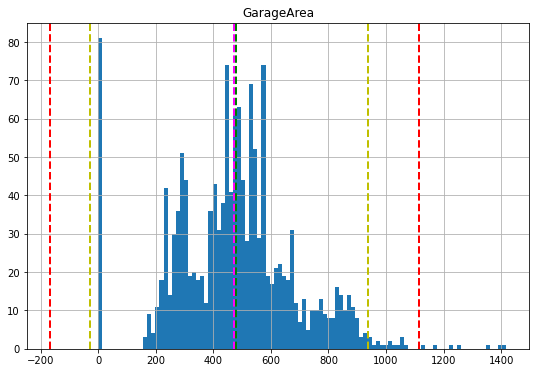

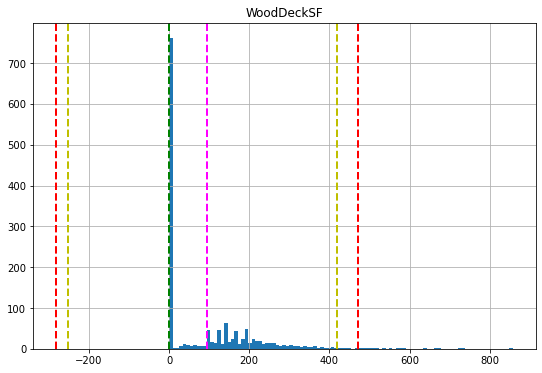

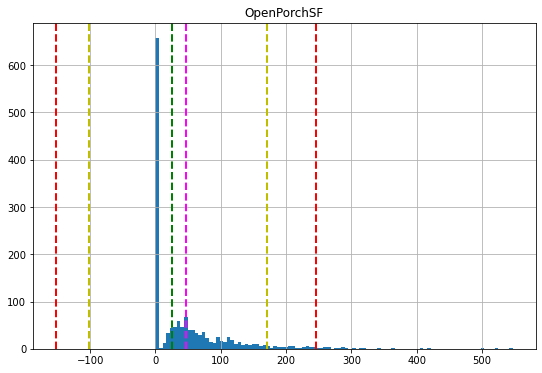

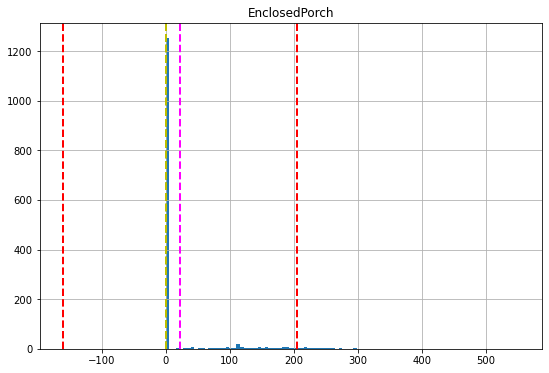

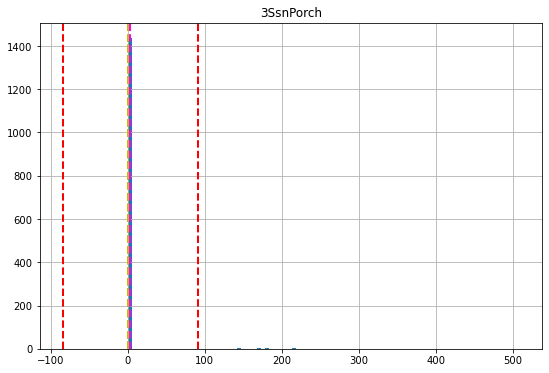

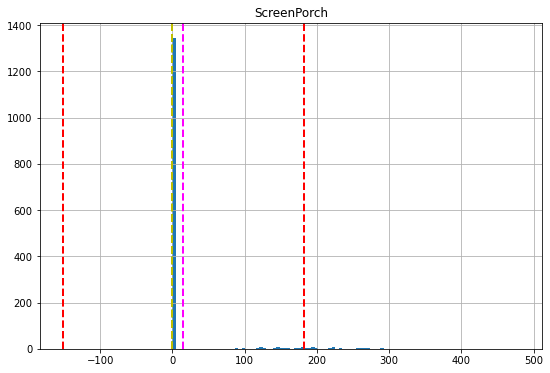

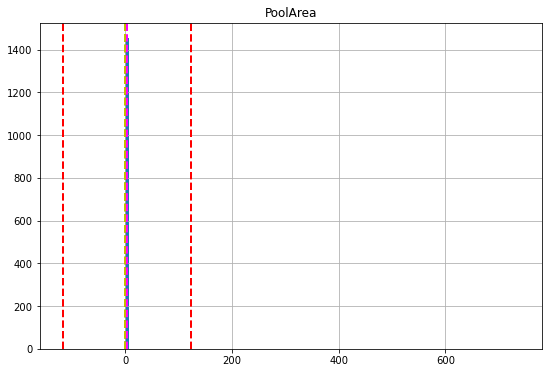

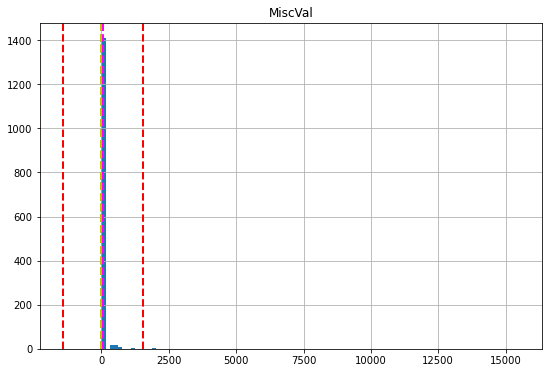

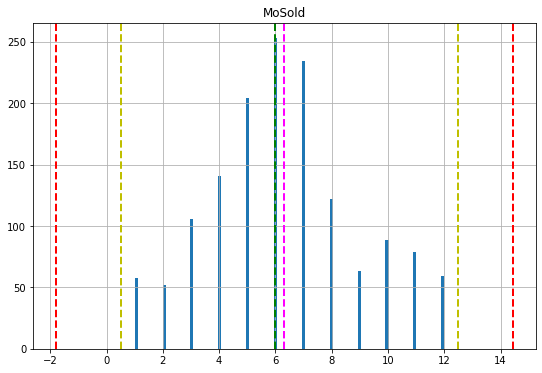

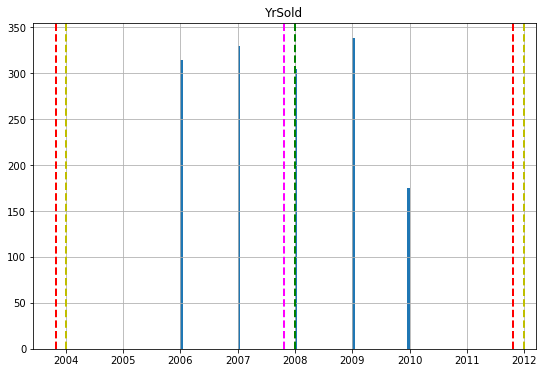

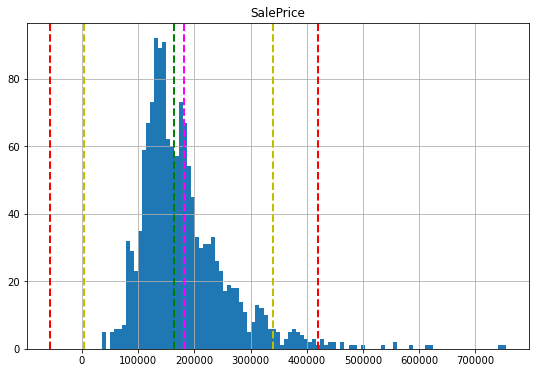

In [17]:
numeric_features=house.select_dtypes(['int64','float64']).columns
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = house[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2) # line is for the mean
    ax.axvline(feature.median(), color='g', linestyle='dashed', linewidth=2)  # line is for the median
    ax.axvline(feature.mean()+3*feature.std(), color='r', linestyle='dashed', linewidth=2) # line is to find outliers following Gausian distribution having more than Mean + 3 Sigma
    ax.axvline(feature.mean()-3*feature.std(), color='r', linestyle='dashed', linewidth=2) # line is to find outliers following Gausian distribution having more than Mean - 3 Sigma
    IQR=feature.quantile(.75)-feature.quantile(.25)
    ax.axvline(feature.quantile(.75)+1.5*IQR, color='y', linestyle='dashed', linewidth=2) # line is to find outliers following fewer distribution 
    ax.axvline(feature.quantile(.25)-1.5*IQR, color='y', linestyle='dashed', linewidth=2) # line is to find outliers following fewer distribution
    ax.set_title(col)
plt.show()

* We can absorb skewness Lot Area, 1stFlrSF, GrLivArea, SalePrice.
* MSSubClass and MoSold are Categorical Variable hence convert to typObject
* More property saled have Overall Quality of Between 5 to 7
* Most property are sold on the month of April to Aug
* Most houses saled of Garage Capacity 2
* Most houses have 3 bedrooms in above grade

In [18]:
df=house.copy()

In [1]:
df[['MSSubClass','MoSold']]=df[['MSSubClass','MoSold']].astype('str')

NameError: name 'df' is not defined

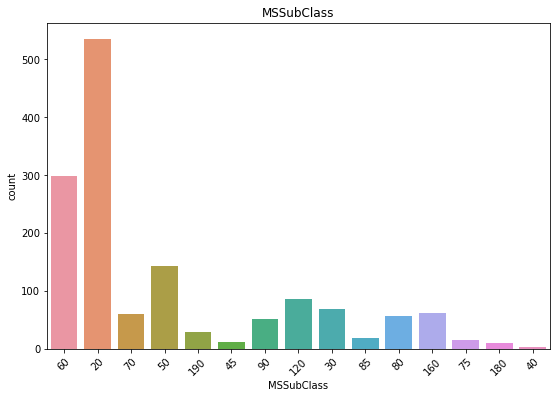

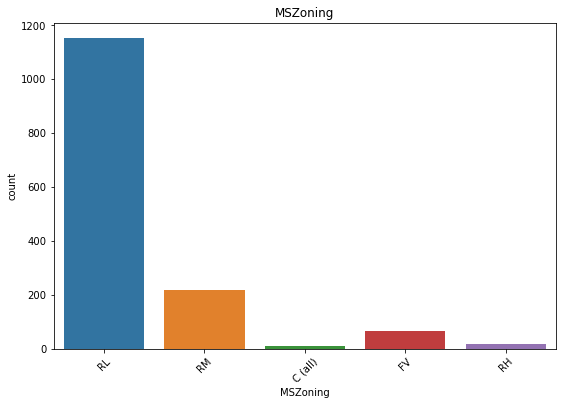

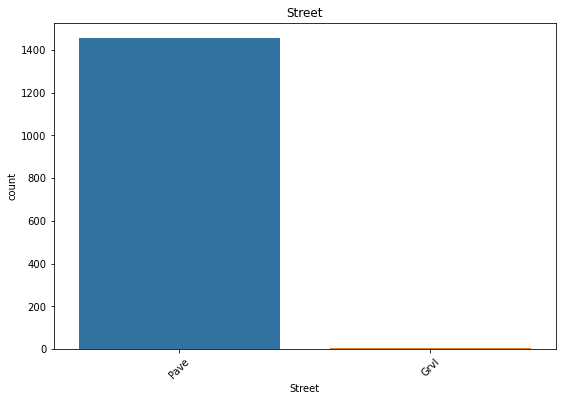

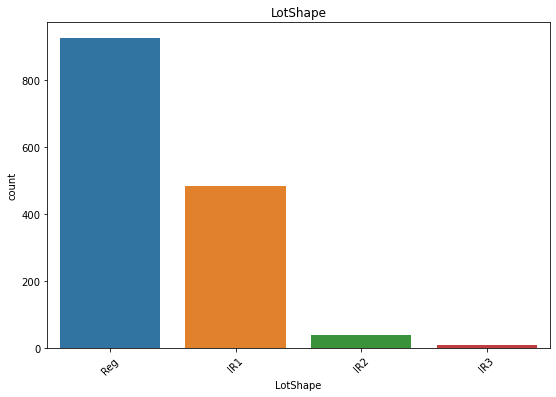

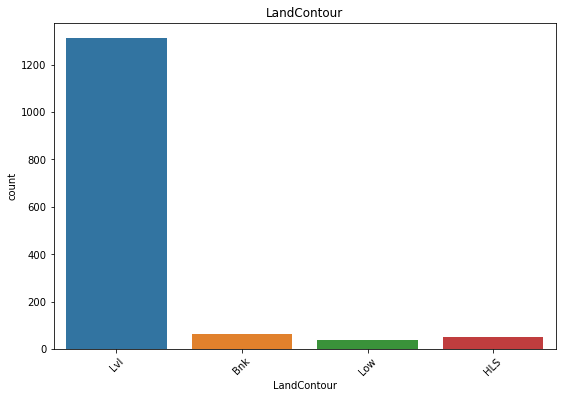

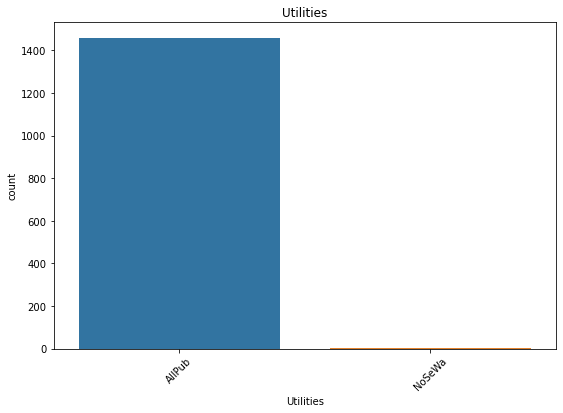

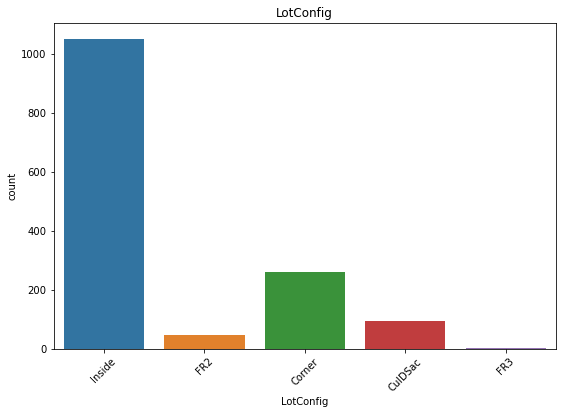

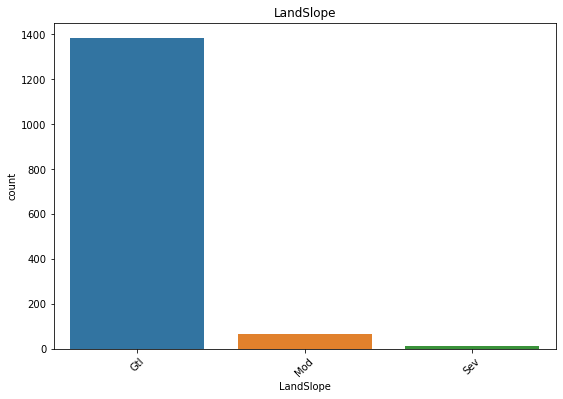

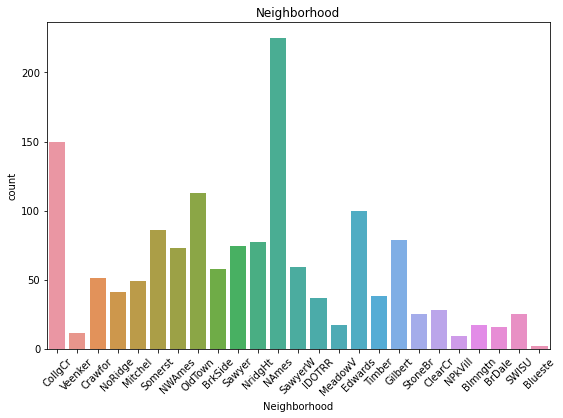

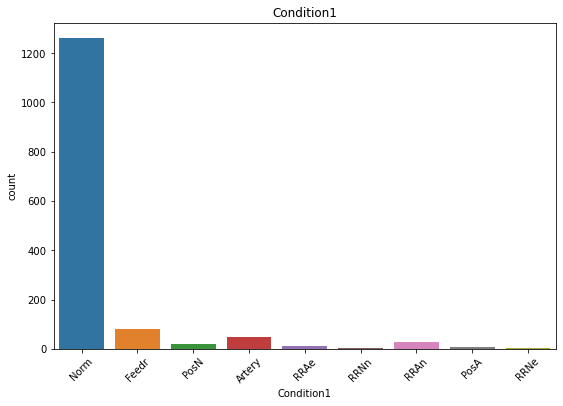

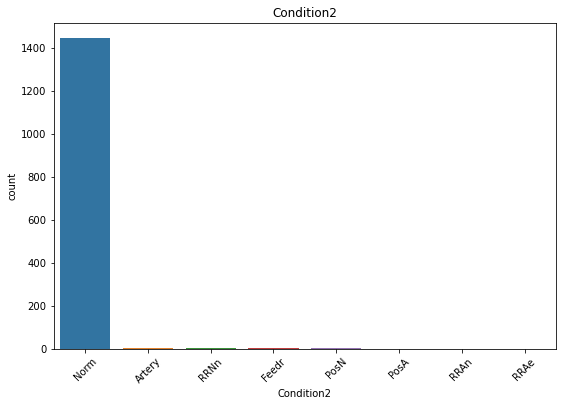

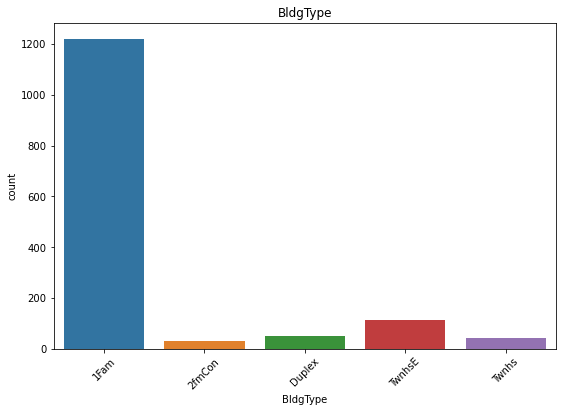

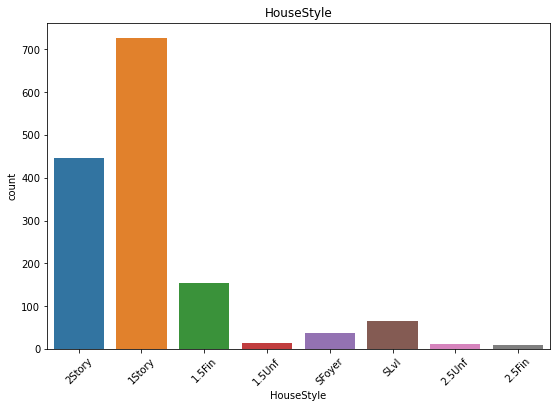

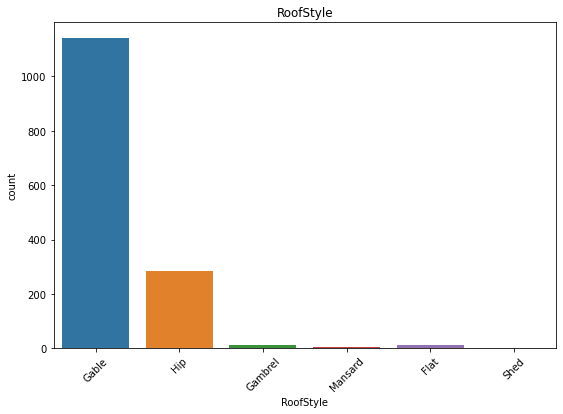

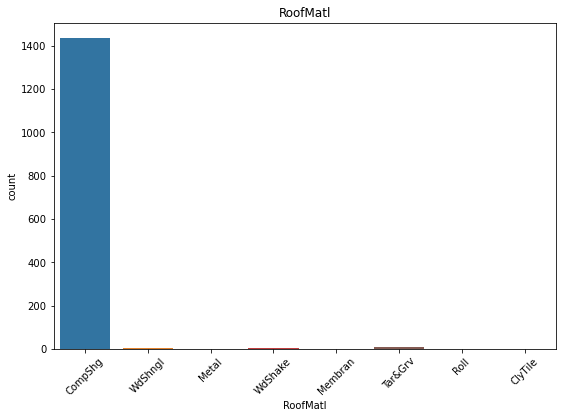

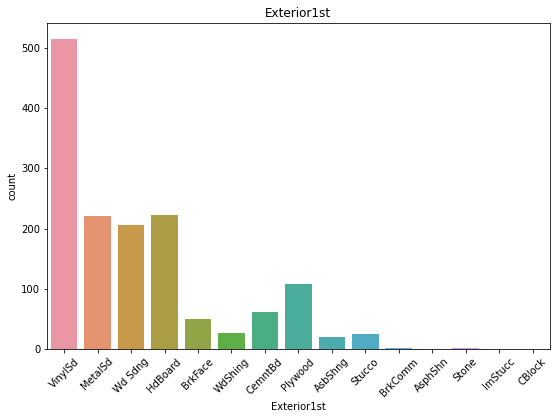

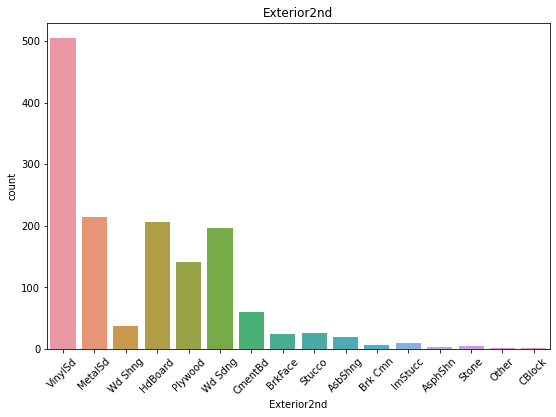

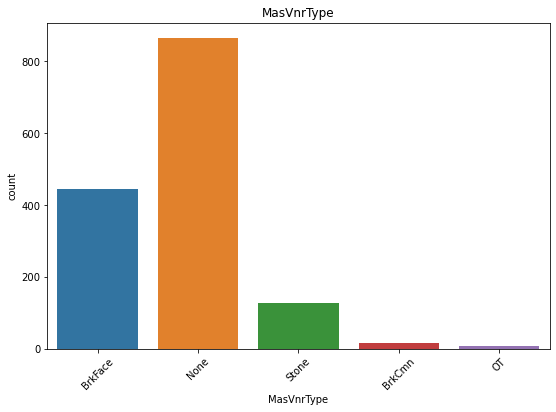

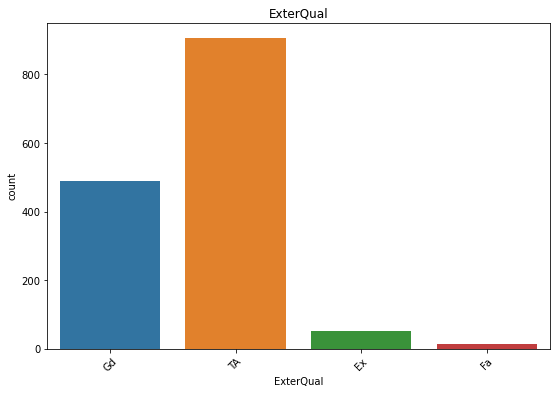

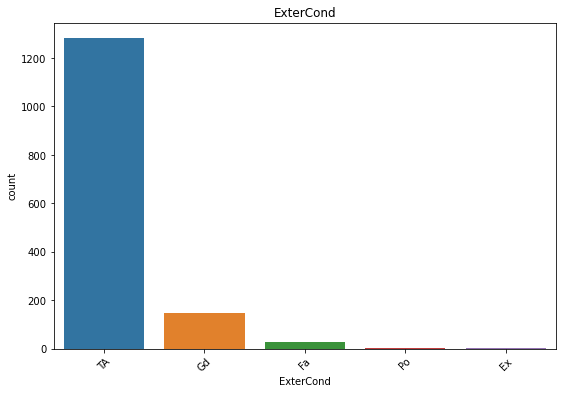

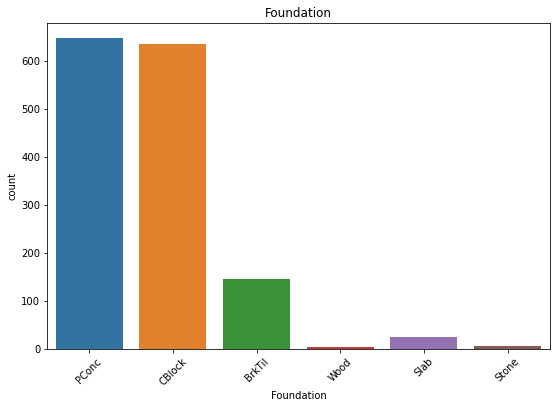

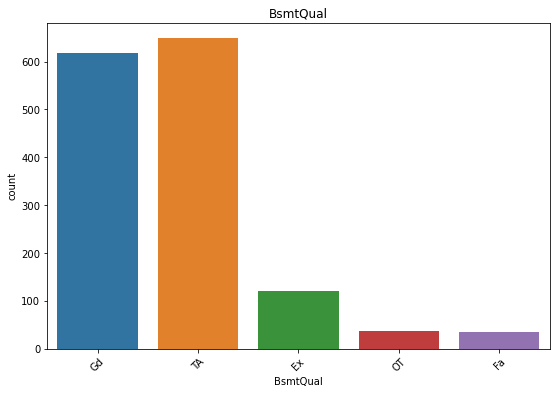

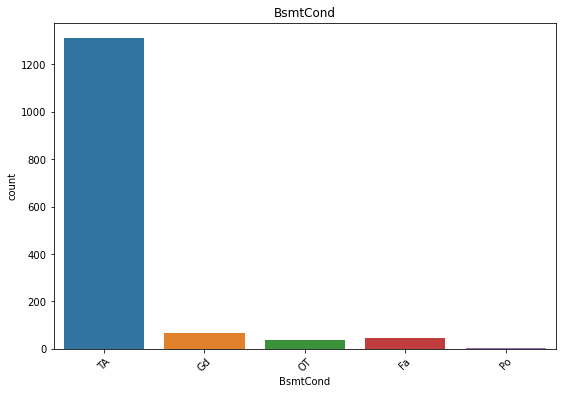

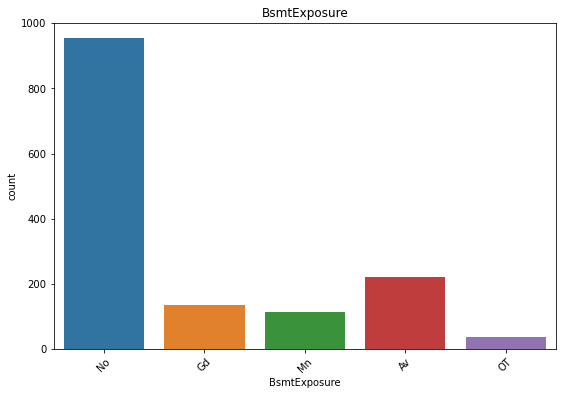

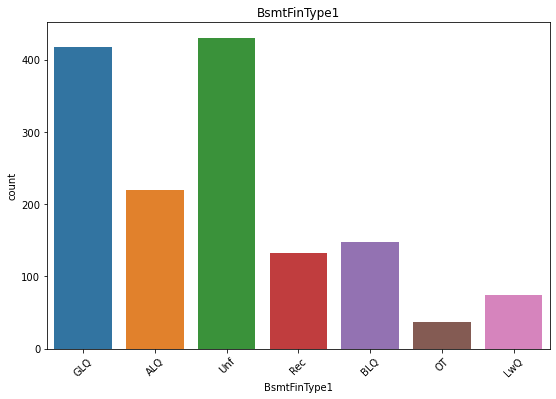

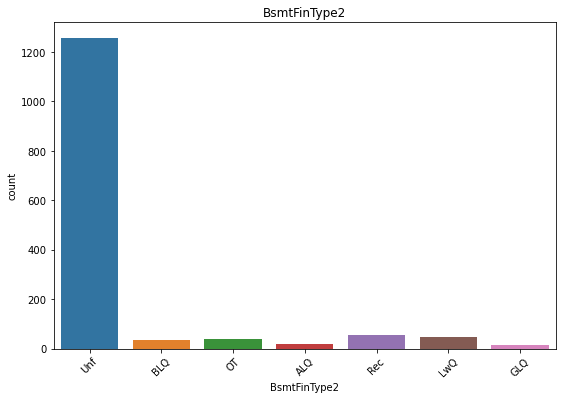

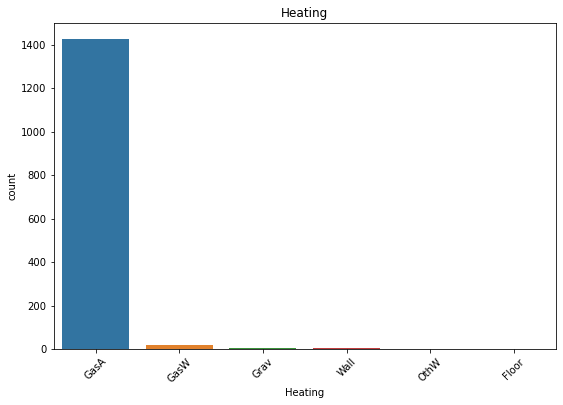

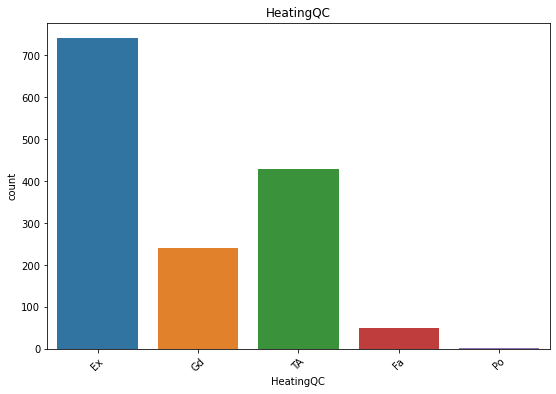

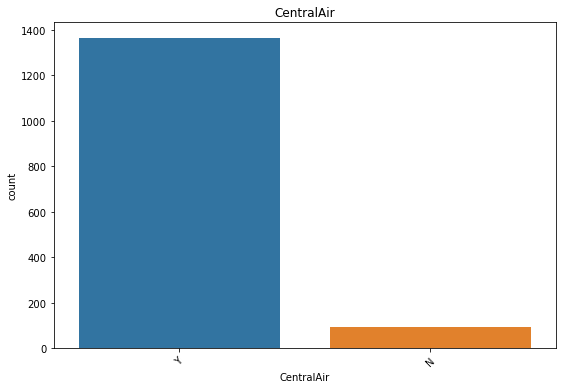

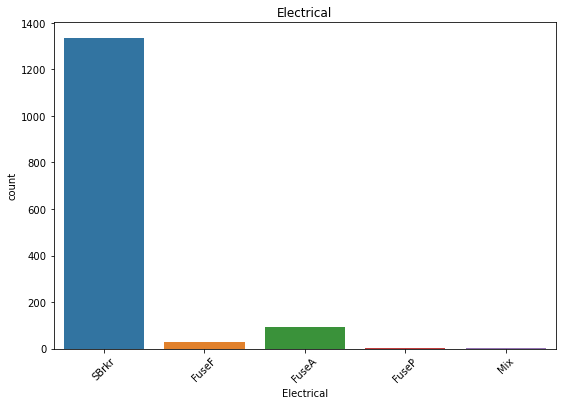

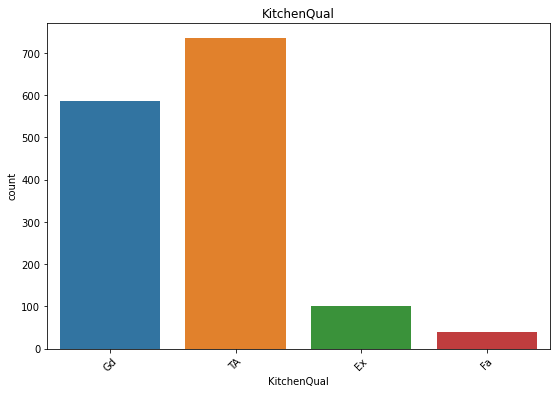

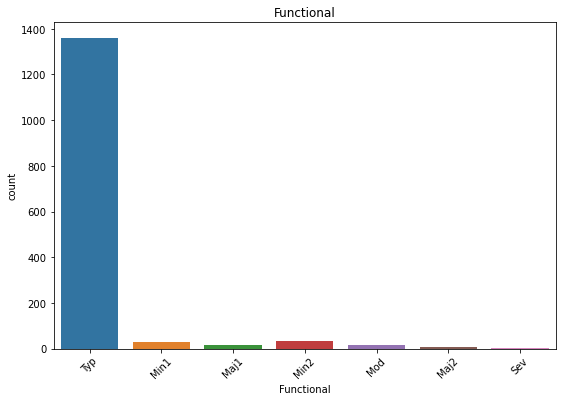

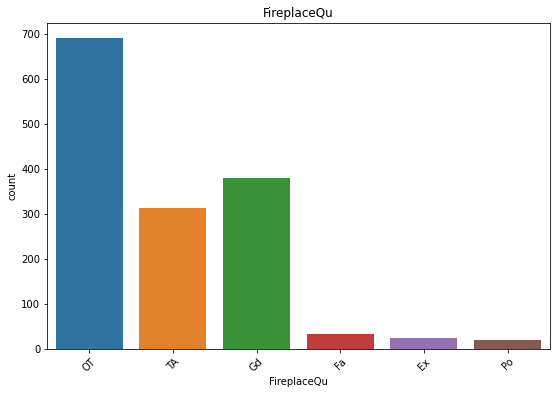

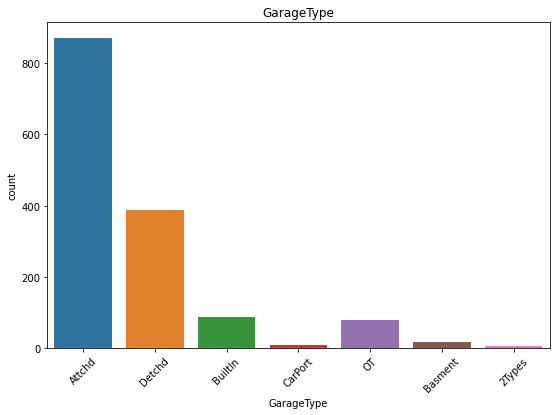

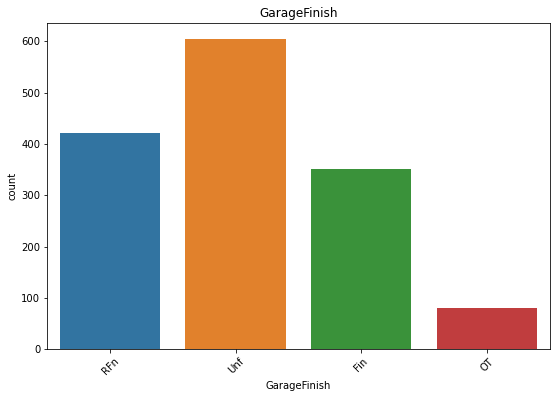

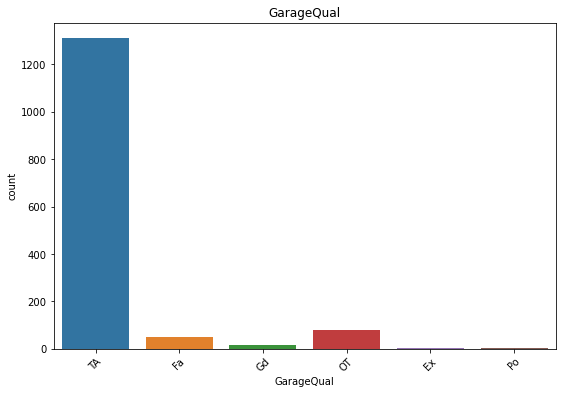

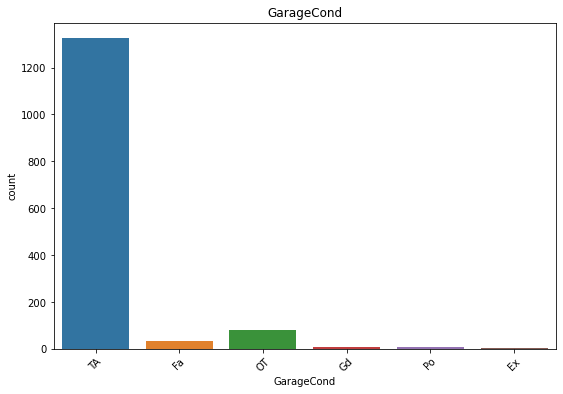

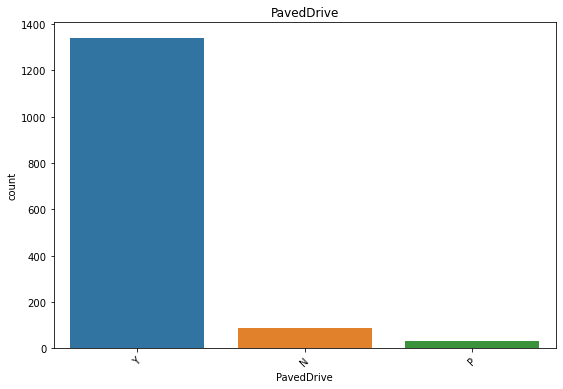

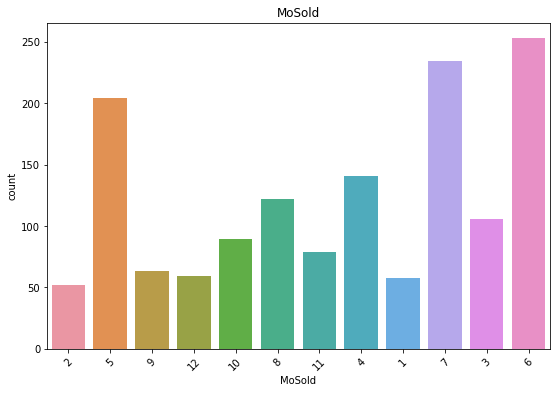

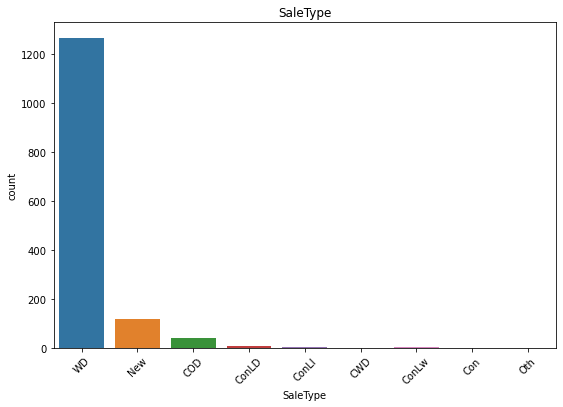

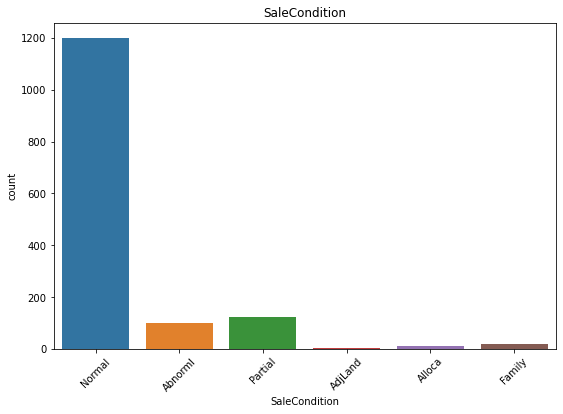

In [20]:
categorical_features=df.select_dtypes('object').columns
# Plot count plot for each categorical variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()    
    sns.countplot(x=col, data=df,ax=ax)    
    ax.set_title(col)   
    plt.xticks(rotation = 45) 
plt.show()

* Nearly 1/3 of the houses are 1-STORY 1946 & NEWER ALL STYLES
* Almost 90% of property are of Normal sales condition ,Warranty Deed - Conventional, Garage condition is Good, Garage quality is Average, House are typical functional,Standard Circuit Breakers & Romex, Central air conditioning, Gas forced warm air furnace, unfinished basement, Typical - slight dampness allowed, Roll Roof Material, Condition2 and Condition1 are normal, Utilities are AllPub, street are Pave
* Nearly 1/3 of the houses are build on Gentle slope area and Regular shape


# Bivariate and multivariate Analysis

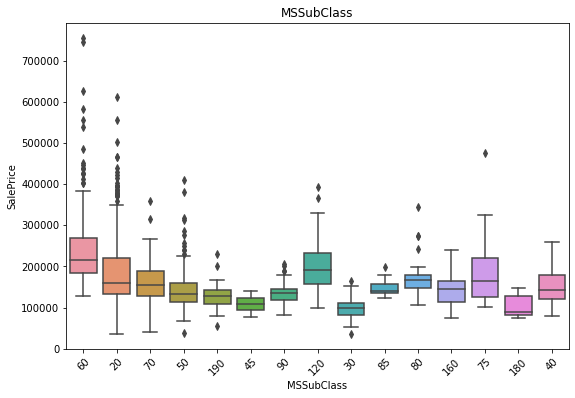

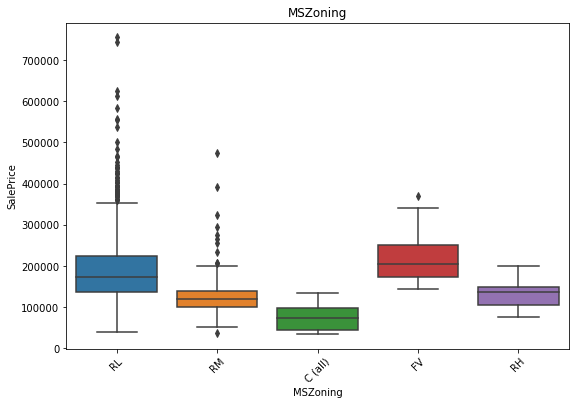

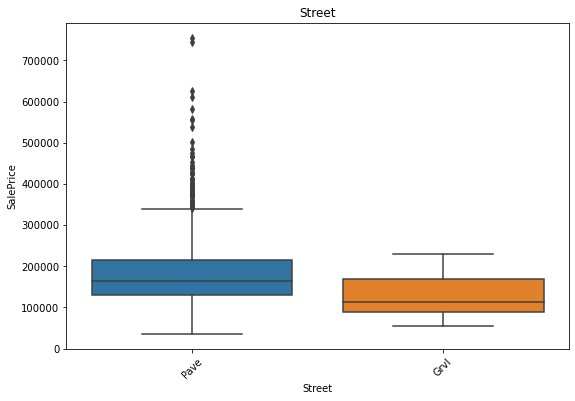

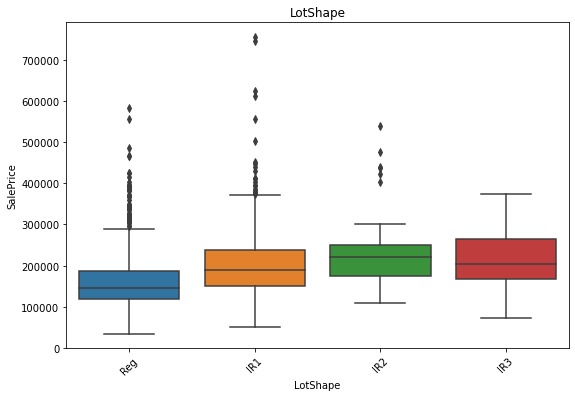

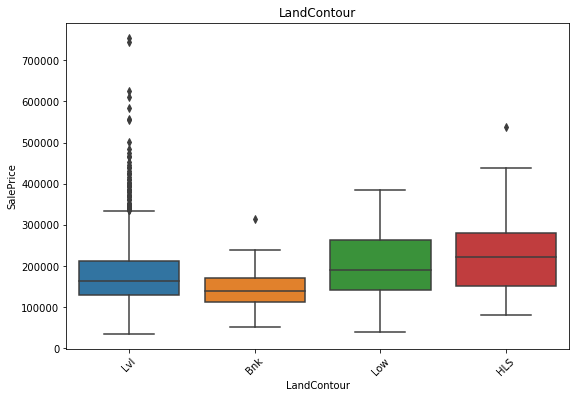

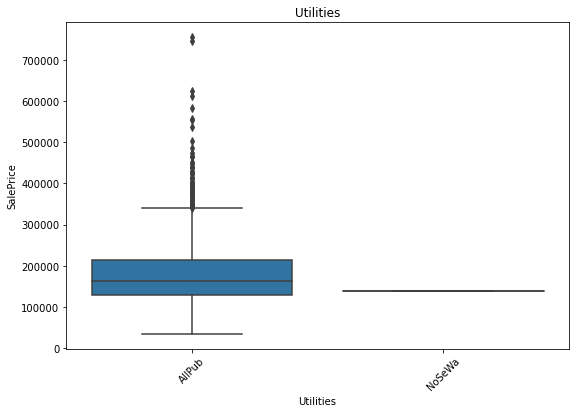

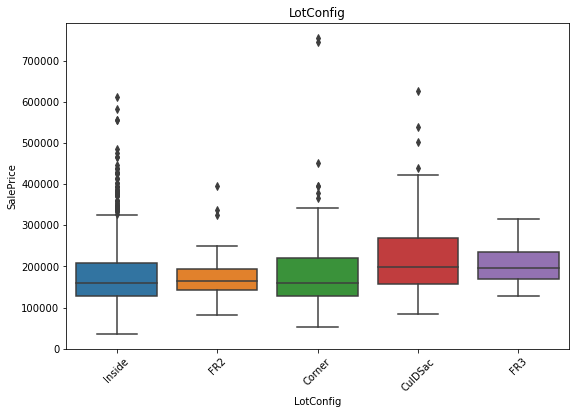

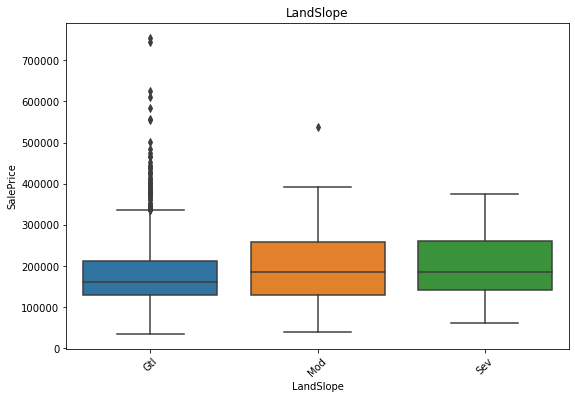

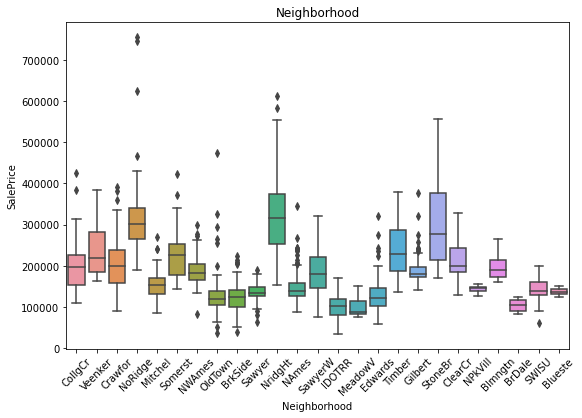

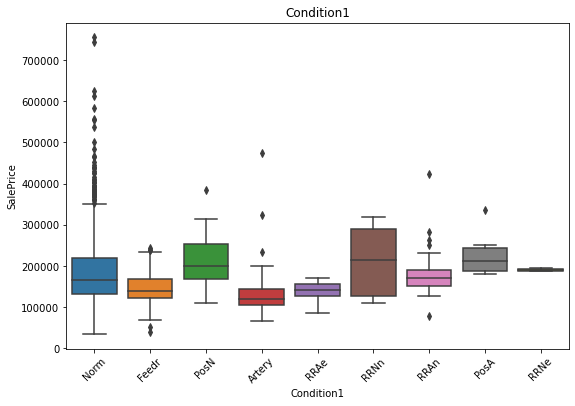

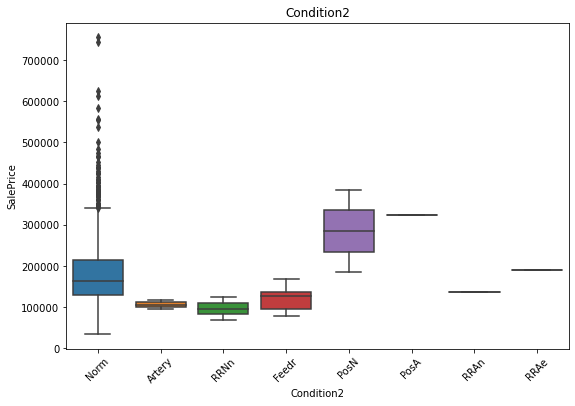

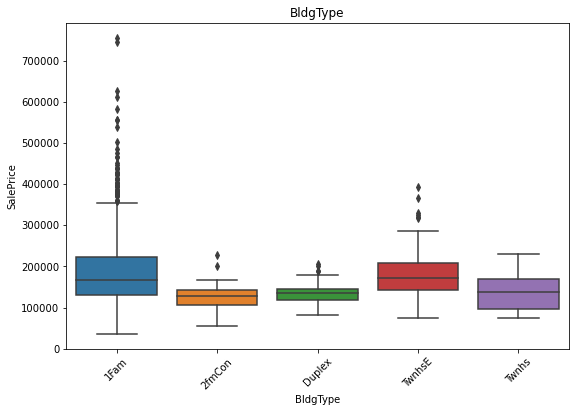

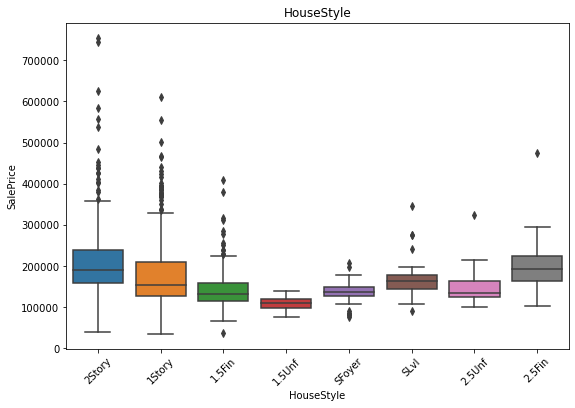

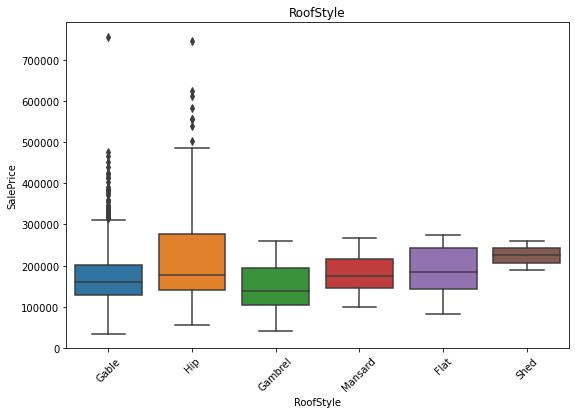

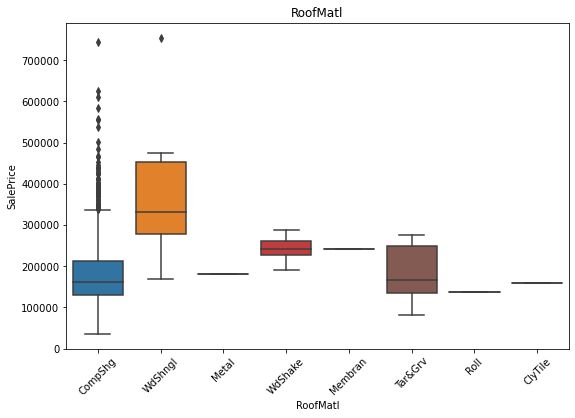

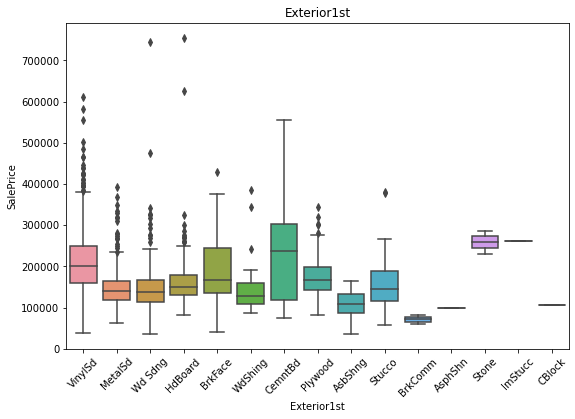

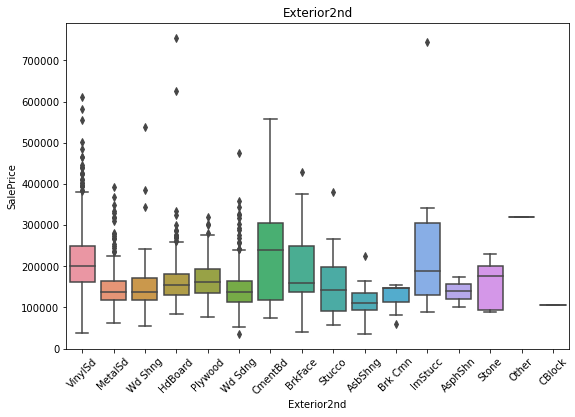

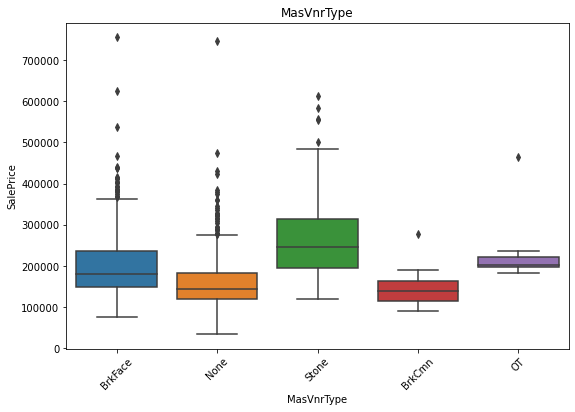

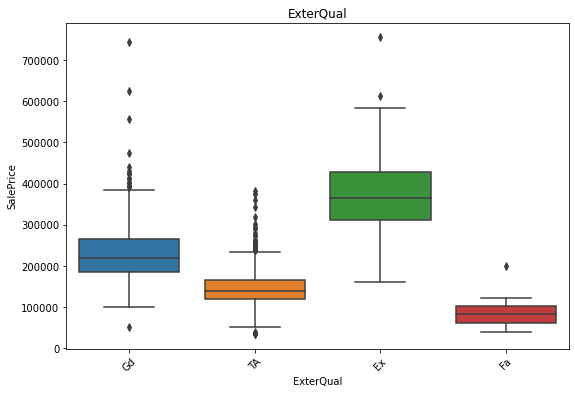

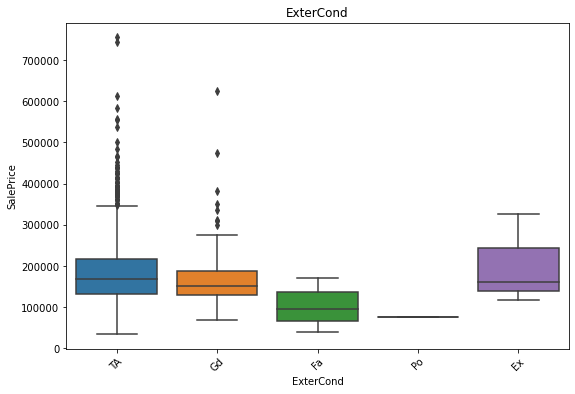

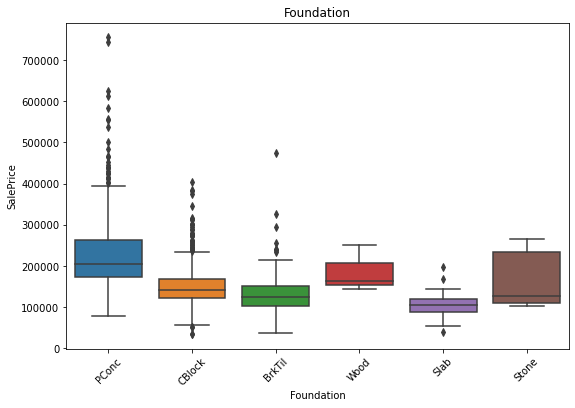

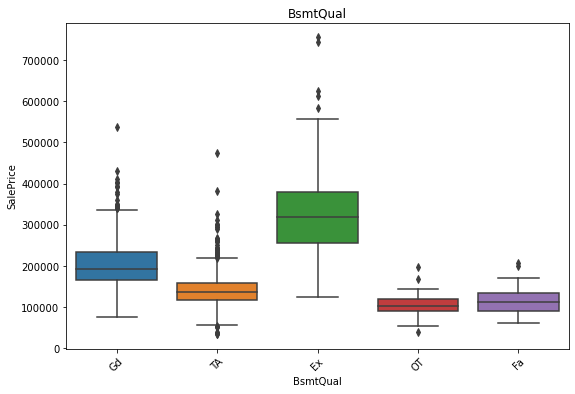

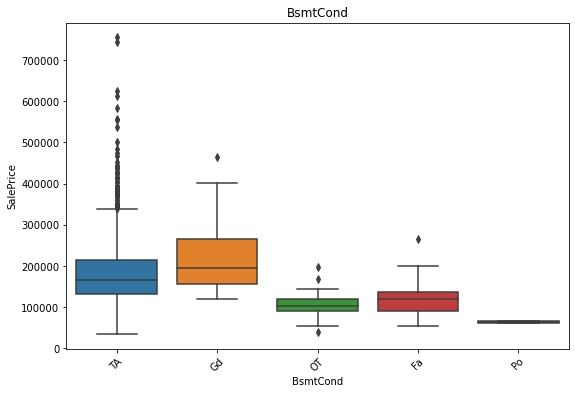

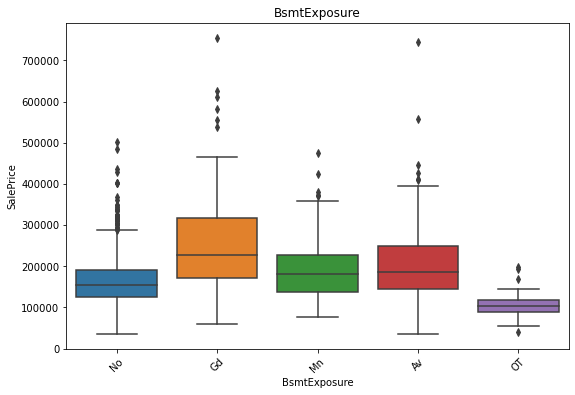

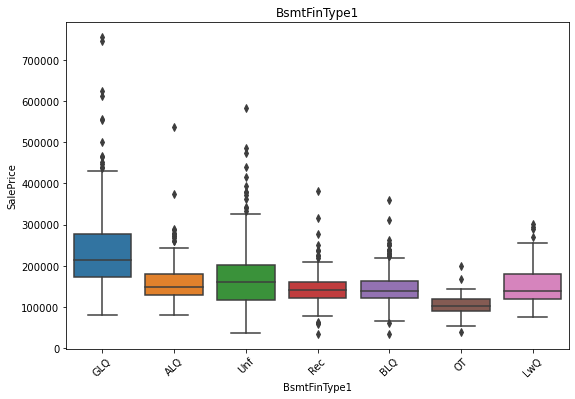

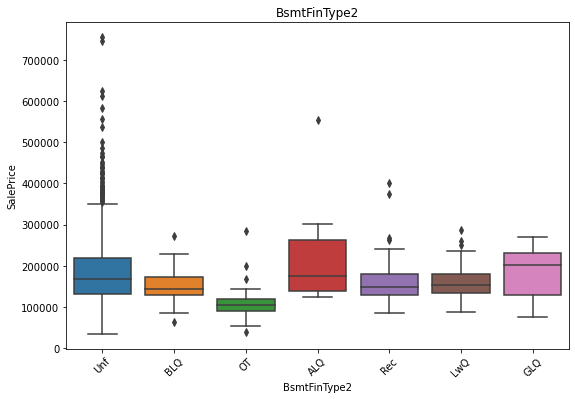

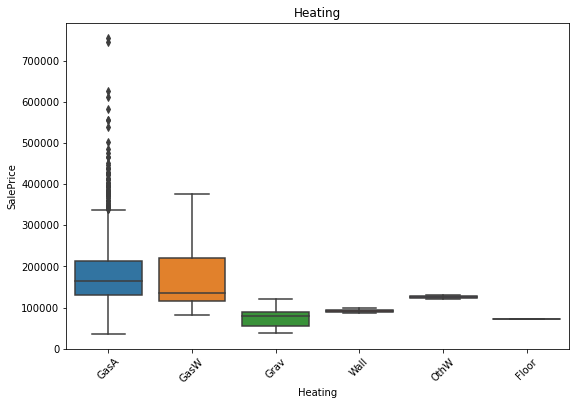

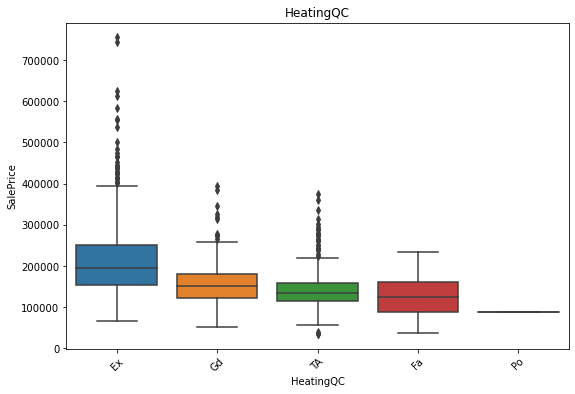

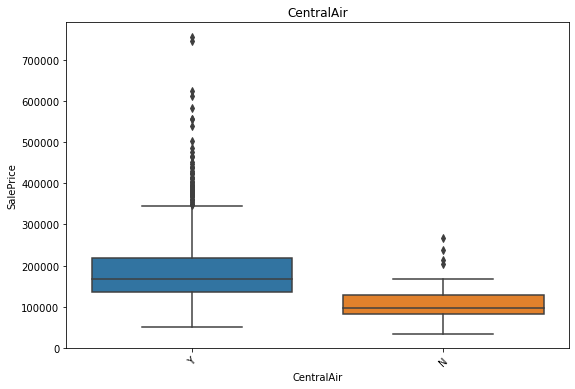

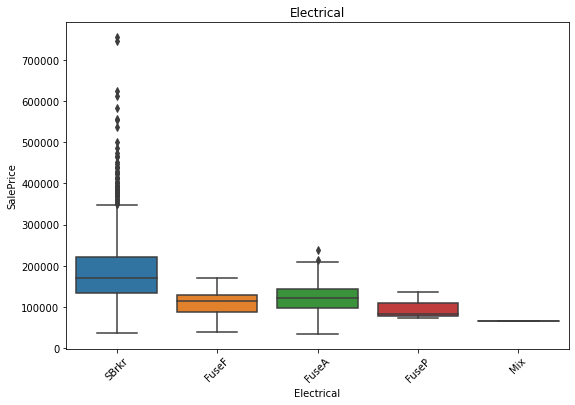

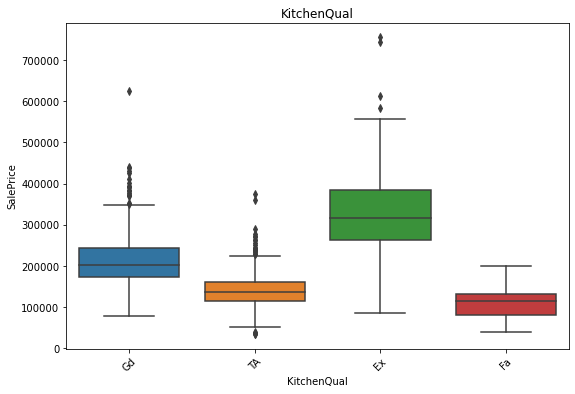

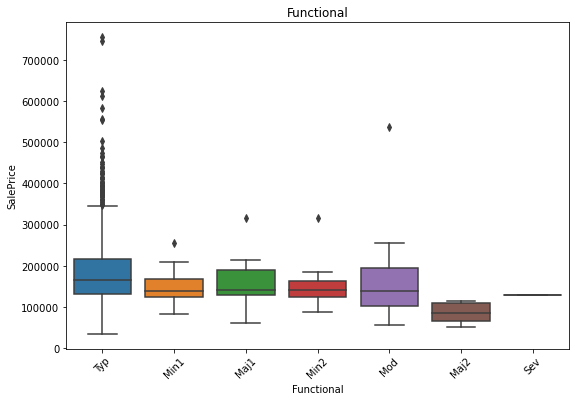

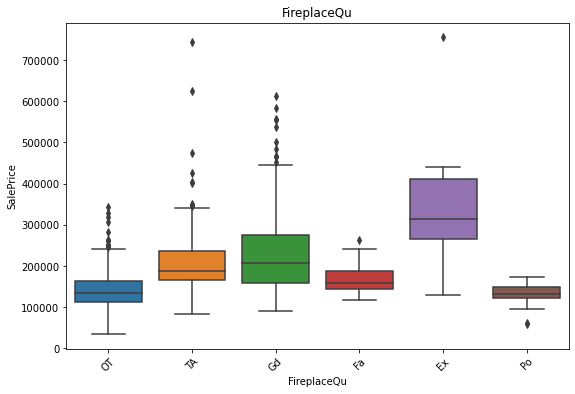

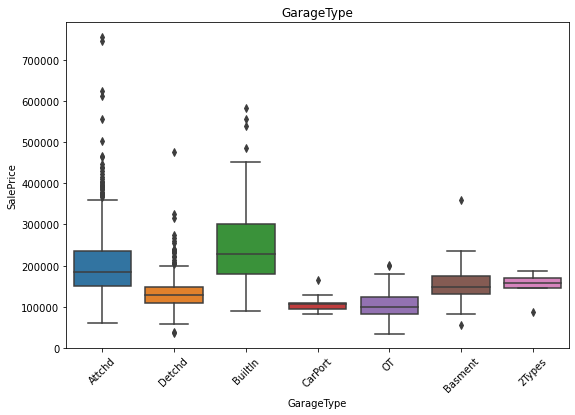

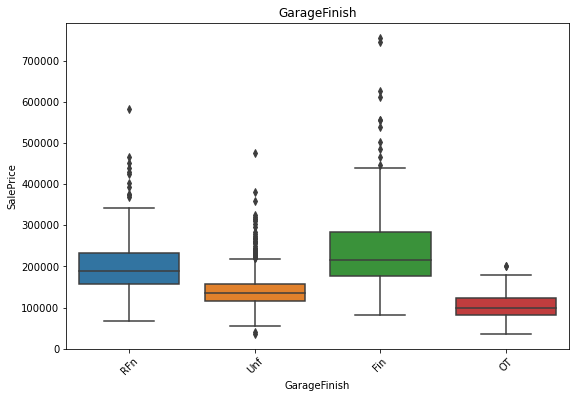

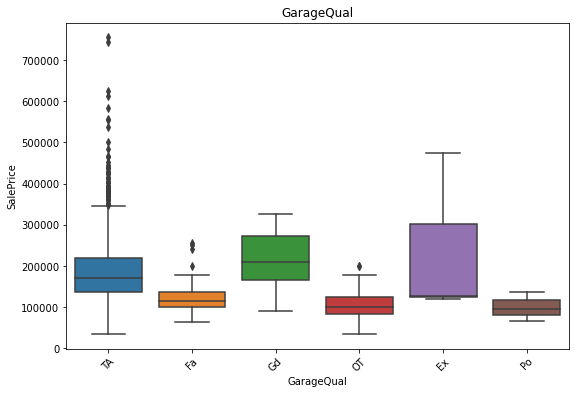

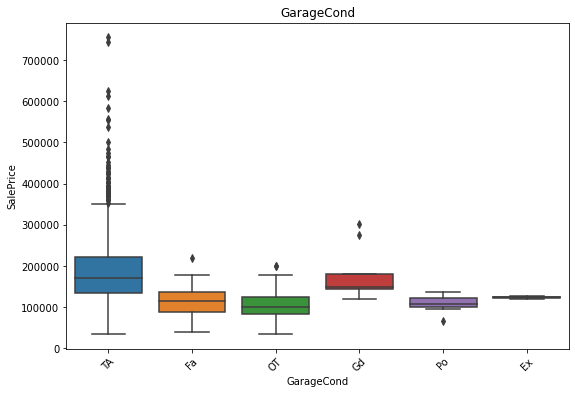

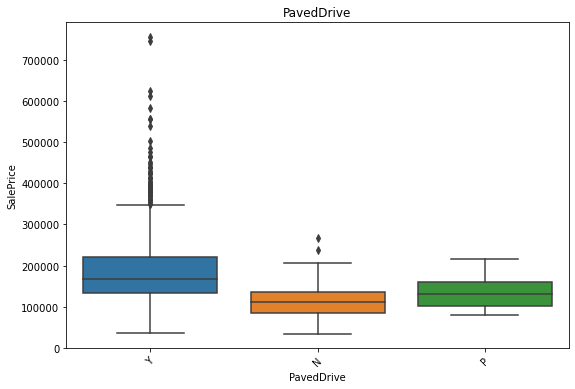

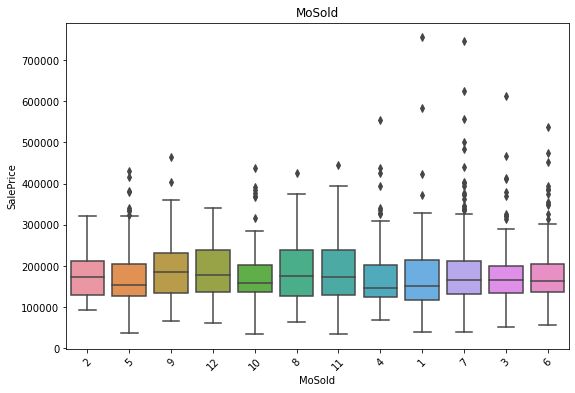

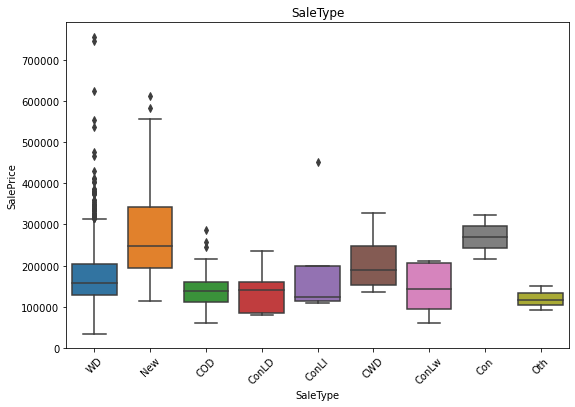

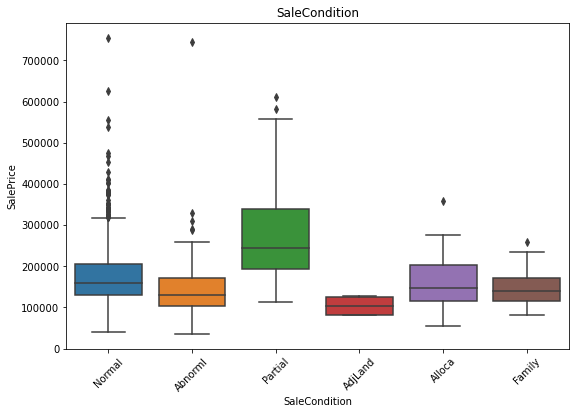

In [21]:
categorical_features=df.select_dtypes('object').columns
for i in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()          
    sns.boxplot(data=df,x=i,y='SalePrice',ax=ax)
    ax.set_title(i)
    plt.xticks(rotation=45)
plt.show()

* Properties near Northridge, Northridge Heights and Stone Brook have usually high sale price
* When Land Slope moderate the price of property is high
* Near positive off-site feature--park, greenbelt, etc or Adjacent to postive off-site feature or Within 200' of North-South Railroad condition have high price
* Overal Quality and Condition as it increases price increases
* Type of roof is hip or roof material of Wood Shingles then price is high


In [22]:
## converting the years to year difference
df['YearBuilt_diff']=df.YrSold-df.YearBuilt
df['YearRemodAdd_diff']=df.YrSold-df.YearRemodAdd
df['GarageYrBlt_diff']=df.YrSold-df.GarageYrBlt

<AxesSubplot:xlabel='GarageYrBlt_diff'>

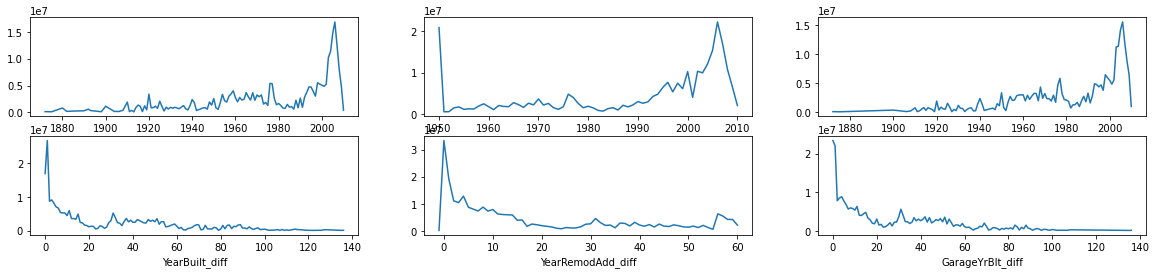

In [23]:
fig, ax=plt.subplots(2,3,figsize=(20,4))

df.groupby('YearBuilt').SalePrice.sum().plot(ax=ax[0][0])
df.groupby('YearRemodAdd').SalePrice.sum().plot(ax=ax[0][1])
df.groupby('GarageYrBlt').SalePrice.sum().plot(ax=ax[0][2])
df.groupby('YearBuilt_diff').SalePrice.sum().plot(ax=ax[1][0])
df.groupby('YearRemodAdd_diff').SalePrice.sum().plot(ax=ax[1][1])
df.groupby('GarageYrBlt_diff').SalePrice.sum().plot(ax=ax[1][2])

In [24]:
df=df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [25]:
numeric_features=df.select_dtypes('int64','float64').columns

# Outlier Treatment

In [26]:
df=df[~(df.SalePrice>df.SalePrice.mean()+3*df.SalePrice.std())]
df=df[~(df.LotArea>df.LotArea.mean()+3*df.LotArea.std())]
df=df[~(df.BsmtFinSF1>df.BsmtFinSF1.mean()+3*df.BsmtFinSF1.std())]
df=df[~(df.BsmtFinSF2>(df.BsmtFinSF2.quantile(.75)-df.BsmtFinSF2.quantile(.25))*1.5+df.BsmtFinSF2.quantile(.75))]
df=df[~(df.TotalBsmtSF>df.TotalBsmtSF.mean()+3*df.TotalBsmtSF.std())]
df=df[~(df.GrLivArea>df.GrLivArea.mean()+3*df.GrLivArea.std())]
df=df[~(df.GarageArea>df.GarageArea.mean()+3*df.GarageArea.std())]
df=df[~(df.WoodDeckSF>df.WoodDeckSF.mean()+3*df.WoodDeckSF.std())]

In [27]:
df.loc[(df.MiscVal>df.MiscVal.mean()+3*df.MiscVal.std()),'MiscVal']=df.MiscVal.mean()+3*df.MiscVal.std()
df.loc[(df.PoolArea>df.PoolArea.mean()+3*df.PoolArea.std()),'PoolArea']=df.PoolArea.mean()+3*df.PoolArea.std()
df.loc[(df.ScreenPorch>df.ScreenPorch.mean()+3*df.ScreenPorch.std()),'ScreenPorch']=df.ScreenPorch.mean()+3*df.ScreenPorch.std()
df.loc[(df.EnclosedPorch>df.EnclosedPorch.mean()+3*df.EnclosedPorch.std()),'EnclosedPorch']=df.EnclosedPorch.mean()+3*df.EnclosedPorch.std()
df.loc[(df.OpenPorchSF>df.OpenPorchSF.mean()+3*df.OpenPorchSF.std()),'OpenPorchSF']=df.OpenPorchSF.mean()+3*df.OpenPorchSF.std()
df.loc[(df.LowQualFinSF>df.LowQualFinSF.mean()+3*df.LowQualFinSF.std()),'LowQualFinSF']=df.LowQualFinSF.mean()+3*df.LowQualFinSF.std()

# Feature Engineering

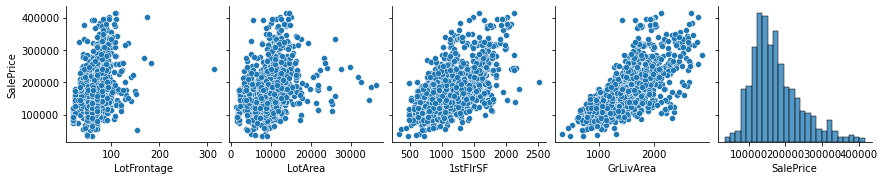

In [28]:
sns.pairplot(data=df[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']],y_vars='SalePrice')

In [29]:
log_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
# Tacking log transform as these numerical variable are skewed
for i in log_features:
    df[i]=np.log(df[i]) 

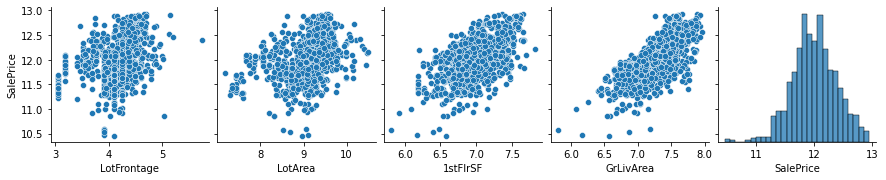

In [30]:
sns.pairplot(data=df[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']],y_vars='SalePrice')

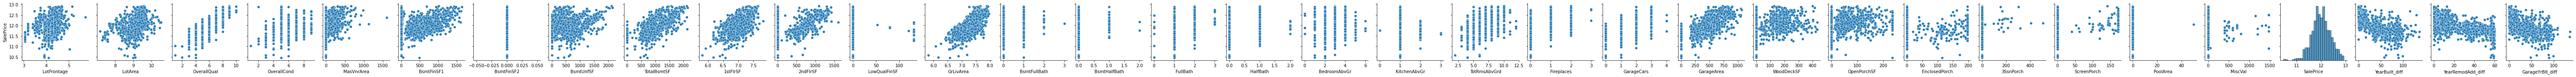

In [31]:
numeric_features=df.select_dtypes(['int64','float64']).columns
sns.pairplot(data=df[numeric_features],y_vars='SalePrice')

In [32]:
df.drop(['BsmtFinSF2'],axis=1,inplace=True) ## All the values are 0 hence dropping the feature

In [33]:
numeric_features=df.select_dtypes(['int64','float64']).columns

In [34]:
cor=df[numeric_features].corr()

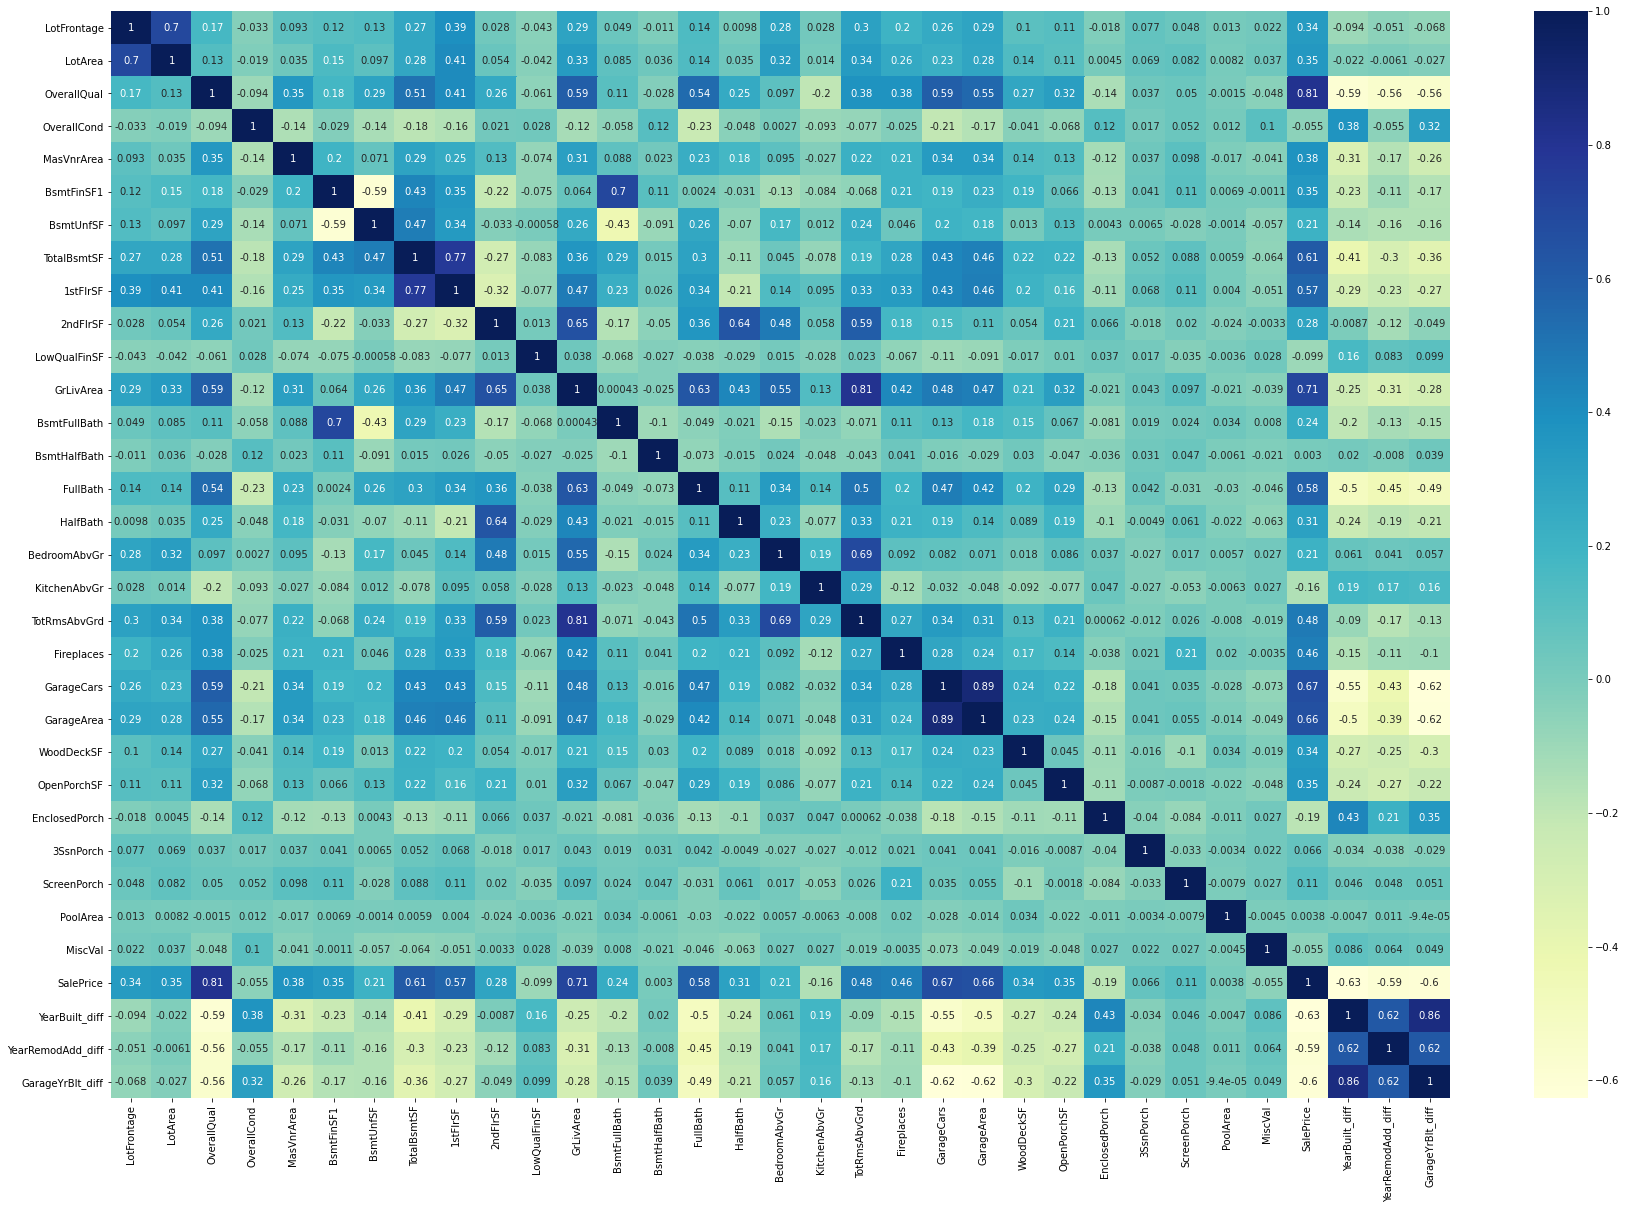

In [35]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu",annot=True)
plt.show()

In [36]:
df.shape

(1230, 74)

In [37]:
## function to check features which are having high correlation 
def correlation(data,threshold):
    col_corr=set()
    cor_matx=data.corr()
    for i in range(len(cor_matx)):
        for j in range(i):
            if(cor_matx.iloc[i,j]>threshold):
                colname=cor_matx.columns[i]
                col_corr.add(colname)
    return col_corr

cor_feature = correlation(df,0.7)

In [38]:
print(len(cor_feature))


6


In [39]:
print((cor_feature))


{'GarageArea', 'GarageYrBlt_diff', 'BsmtFullBath', 'TotRmsAbvGrd', 'SalePrice', '1stFlrSF'}


In [40]:
## droping the features that are having high correlation
df.drop(['GarageYrBlt_diff','BsmtFullBath', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF'],axis=1,inplace=True)

In [41]:
for i in categorical_features:
    print(round(df.groupby(i)['SalePrice'].count()/len(df)*100))

MSSubClass
120     6.0
160     4.0
180     1.0
190     2.0
20     35.0
30      5.0
40      0.0
45      1.0
50     10.0
60     21.0
70      5.0
75      1.0
80      3.0
85      1.0
90      4.0
Name: SalePrice, dtype: float64
MSZoning
C (all)     1.0
FV          5.0
RH          1.0
RL         77.0
RM         16.0
Name: SalePrice, dtype: float64
Street
Grvl      0.0
Pave    100.0
Name: SalePrice, dtype: float64
LotShape
IR1    32.0
IR2     2.0
IR3     1.0
Reg    65.0
Name: SalePrice, dtype: float64
LandContour
Bnk     4.0
HLS     4.0
Low     2.0
Lvl    90.0
Name: SalePrice, dtype: float64
Utilities
AllPub    100.0
Name: SalePrice, dtype: float64
LotConfig
Corner     18.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Inside     73.0
Name: SalePrice, dtype: float64
LandSlope
Gtl    96.0
Mod     4.0
Sev     0.0
Name: SalePrice, dtype: float64
Neighborhood
Blmngtn     1.0
Blueste     0.0
BrDale      1.0
BrkSide     4.0
ClearCr     1.0
CollgCr    11.0
Crawfor     4.0
Edwards     7.0
Gilbert  

In [42]:
# Removing below columns as these columns have very less distribution accross categories 
cate_feature=list(categorical_features)
remove_cat=['MSSubClass','Neighborhood','Exterior1st','Exterior2nd','MoSold']
for i in remove_cat:
    cate_feature.remove(i)
# Converting Categorical features which lesser persentage together to OT Category
for i in cate_feature:
    cate_grp = df.groupby(i)['SalePrice'].count()/len(df)*100
    cate_grp_index= cate_grp[cate_grp>5].index
    df[i] = np.where(df[i].isin(cate_grp_index),df[i],'OT')

In [43]:
for i in categorical_features:
    print(round(df.groupby(i)['SalePrice'].count()/len(df)*100))

MSSubClass
120     6.0
160     4.0
180     1.0
190     2.0
20     35.0
30      5.0
40      0.0
45      1.0
50     10.0
60     21.0
70      5.0
75      1.0
80      3.0
85      1.0
90      4.0
Name: SalePrice, dtype: float64
MSZoning
FV     5.0
OT     2.0
RL    77.0
RM    16.0
Name: SalePrice, dtype: float64
Street
OT        0.0
Pave    100.0
Name: SalePrice, dtype: float64
LotShape
IR1    32.0
OT      3.0
Reg    65.0
Name: SalePrice, dtype: float64
LandContour
Lvl    90.0
OT     10.0
Name: SalePrice, dtype: float64
Utilities
AllPub    100.0
Name: SalePrice, dtype: float64
LotConfig
Corner     18.0
CulDSac     6.0
Inside     73.0
OT          4.0
Name: SalePrice, dtype: float64
LandSlope
Gtl    96.0
OT      4.0
Name: SalePrice, dtype: float64
Neighborhood
Blmngtn     1.0
Blueste     0.0
BrDale      1.0
BrkSide     4.0
ClearCr     1.0
CollgCr    11.0
Crawfor     4.0
Edwards     7.0
Gilbert     6.0
IDOTRR      3.0
MeadowV     1.0
Mitchel     3.0
NAmes      13.0
NPkVill     1.0
NWAmes      4

In [44]:
## Droping these columns as almost 99 % are of single category
df.drop(['Utilities', 'Street', 'Condition2'],axis=1,inplace=True)

In [45]:
numeric_features=df.select_dtypes(['int64','float64']).columns

In [46]:
categorical_features=df.select_dtypes('object').columns
## Get the dummies of the Categorical Variable
df_dummies=pd.get_dummies(data=df,columns=categorical_features,drop_first=True)

In [47]:
df_dummies.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
Id                                                                            
1      4.174387  9.041922            7            5       196.0         706   
2      4.382027  9.169518            6            8         0.0         978   
3      4.219508  9.328123            7            5       162.0         486   
4      4.094345  9.164296            7            5         0.0         216   
5      4.430817  9.565214            8            5       350.0         655   

    BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtHalfBath  \
Id                                                                            
1         150          856       854           0.0   7.444249             0   
2         284         1262         0           0.0   7.140453             1   
3         434          920       866           0.0   7.487734             0   
4         540          756       756           0.0   7.448334             0   
5         490         1145      1053           0.0   7.695303             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  \
Id                                                                           
1          2         1             3             1           0           2   
2          2         0             3             1           1           2   
3          2         1             3             1           1           2   
4          1         0             3             1           1           3   
5          2         1             4             1           1           3   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Id                                                                             
1            0         61.0       0.000000          0          0.0       0.0   
2          298          0.0       0.000000          0          0.0       0.0   
3            0         42.0       0.000000          0          0.0       0.0   
4            0         35.0     197.580674          0          0.0       0.0   
5          192         84.0       0.000000          0          0.0       0.0   

    MiscVal  SalePrice  YearBuilt_diff  YearRemodAdd_diff  MSSubClass_160  \
Id                                                                          
1       0.0  12.247694               5                  5               0   
2       0.0  12.109011              31                 31               0   
3       0.0  12.317167               7                  6               0   
4       0.0  11.849398              91                 36               0   
5       0.0  12.429216               8                  8               0   

    MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
Id                                                                 
1                0               0              0              0   
2                0               0              1              0   
3                0               0              0              0   
4                0               0              0              0   
5                0               0              0              0   

    MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
Id                                                                              
1               0              0              0              1              0   
2               0              0              0              0              0   
3               0              0              0              1              0   
4               0              0              0              0              1   
5               0              0              0              1              0   

    MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSZoning_OT  \
Id                                                                            
1               0              0             

In [48]:
cor_feature = correlation(df_dummies,0.7)

In [49]:
print((cor_feature))


{'Exterior2nd_CmentBd', 'GarageCond_TA', 'HouseStyle_2Story', 'Exterior2nd_Plywood', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_VinylSd', 'BsmtExposure_OT', 'SalePrice', 'GarageFinish_OT', 'HouseStyle_1Story'}


In [50]:
print(len(cor_feature))

14


In [51]:
## dropping highlighly corelated features
df_dummies.drop(['HouseStyle_2Story', 'GarageCond_TA', 'Exterior2nd_Plywood', 'HouseStyle_1Story', 'Exterior2nd_AsphShn', 'Exterior2nd_MetalSd', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'BsmtExposure_OT', 'GarageFinish_OT', 'Exterior2nd_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_CmentBd'],axis=1,inplace=True)

In [52]:
df_train,df_test=train_test_split(df_dummies,train_size=0.7,random_state=100)


In [53]:
y_train=df_train.pop('SalePrice')
X_train=df_train
y_test=df_test.pop('SalePrice')
X_test=df_test


In [54]:
numeric_fea=list(numeric_features)
numeric_fea.remove('SalePrice')

In [55]:
numeric_features=numeric_fea

In [56]:
scalar=MinMaxScaler()
X_train[numeric_features]=scalar.fit_transform(X_train[numeric_features])
X_test[numeric_features]=scalar.transform(X_test[numeric_features])

In [57]:
len(X_train)

861

In [58]:
X_train.shape

(861, 161)

## Ridge Regression

In [59]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [61]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridfecoeff=ridge.coef_

In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9380441922434273
0.8999402133370873
7.495122499244918
5.739431244213623
0.008705136468344853
0.015554014211961039


Text(0, 0.5, 'y_pred')

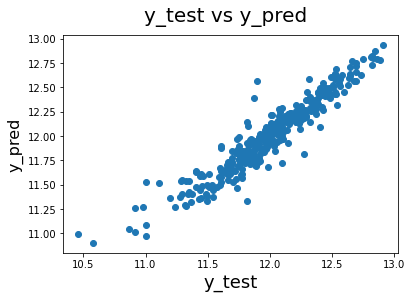

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

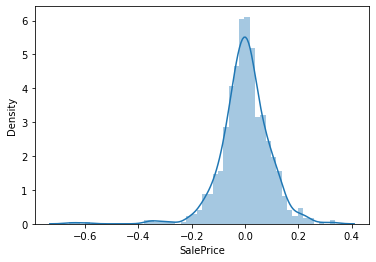

In [64]:
res=y_train-y_pred_train
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

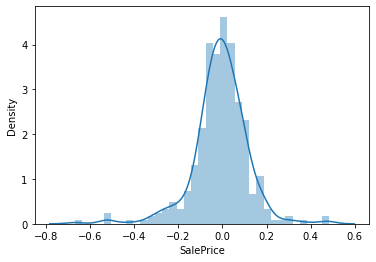

In [65]:
res=y_test-y_pred_test
sns.distplot(res)

In [66]:
coeff=list(zip(ridge.coef_,X_train.columns))
sorted_coeff = sorted(coeff, key=lambda x: x[0])

result=pd.DataFrame (sorted_coeff,columns=['coef_','features'])
result=result[result.coef_!=0].sort_values(by='coef_',ascending=False)

In [67]:
fig = px.bar(x=result.features, y=result.coef_, title="Coefficients")
fig.show()

In [68]:
#Fitting Ridge model by doubling the alpha
alpha = 4
ridgedouble = Ridge(alpha=alpha)

ridgedouble.fit(X_train, y_train)

Ridge(alpha=4)

In [69]:
ridgedoublecoeff=ridgedouble.coef_

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgedouble.predict(X_train)
y_pred_test = ridgedouble.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9346808101737132
0.897952203494778
7.902008657897203
5.853463526145159
0.009177710404061791
0.015863044786301243


Text(0, 0.5, 'y_pred')

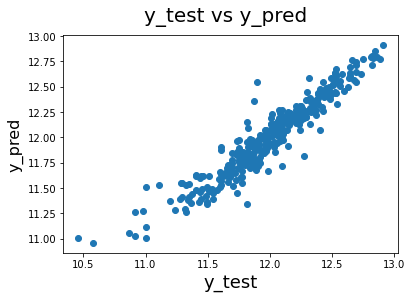

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

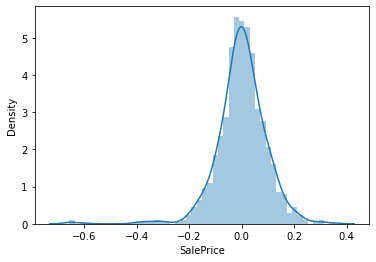

In [72]:
res=y_train-y_pred_train
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

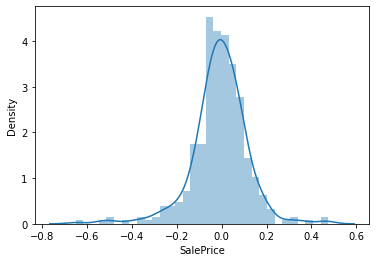

In [73]:
res=y_test-y_pred_test
sns.distplot(res)

In [74]:
coeff=list(zip(ridgedouble.coef_,X_train.columns))
sorted_coeff = sorted(coeff, key=lambda x: x[0])

result=pd.DataFrame (sorted_coeff,columns=['coef_','features'])
result=result[result.coef_!=0].sort_values(by='coef_',ascending=False)

fig = px.bar(x=result.features, y=result.coef_, title="Coefficients")
fig.show()

## Lasso

In [75]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [77]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [78]:
lassocoef=lasso.coef_

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9397049529678729
0.9061161438143746
7.294211470523258
5.385179755922455
0.008471790325810986
0.014593983078380637


Text(0, 0.5, 'y_pred')

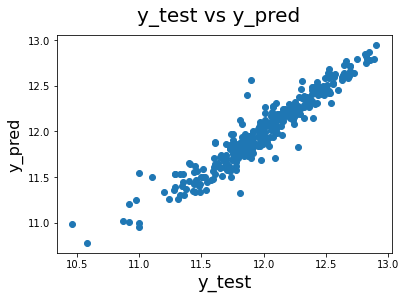

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

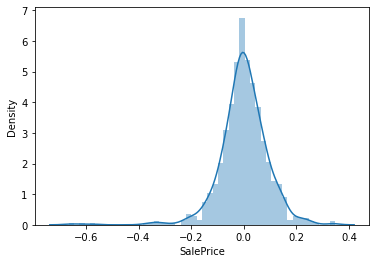

In [81]:
res=y_train-y_pred_train
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

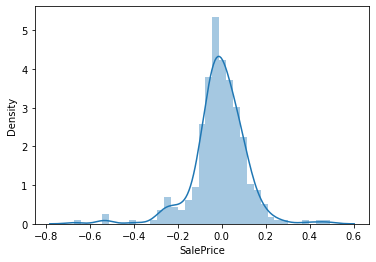

In [82]:
res=y_test-y_pred_test
sns.distplot(res)

In [83]:
coeff=list(zip(lasso.coef_,X_train.columns))
sorted_coeff = sorted(coeff, key=lambda x: x[0])

result=pd.DataFrame (sorted_coeff,columns=['coef_','features'])
result=result[result.coef_!=0].sort_values(by='coef_',ascending=False)

In [84]:
fig = px.bar(x=result.features, y=result.coef_, title="Coefficients")
fig.show()

In [85]:
#Fitting Lasso model by doubling the alpha

alpha =0.0002

lassodouble = Lasso(alpha=alpha)
        
lassodouble.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [86]:
lassodoublecoef=lassodouble.coef_

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassodouble.predict(X_train)
y_pred_test = lassodouble.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9380349340885367
0.9079374758278587
7.496242507320592
5.280708117386054
0.008706437290732396
0.014310862106737274


Text(0, 0.5, 'y_pred')

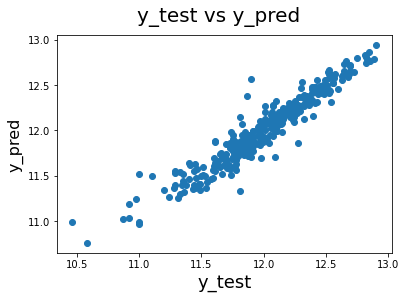

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

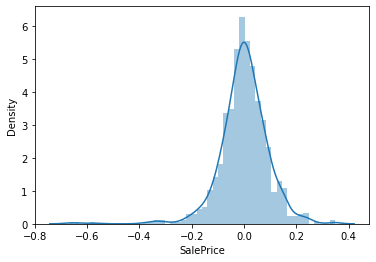

In [89]:
res=y_train-y_pred_train
sns.distplot(res)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

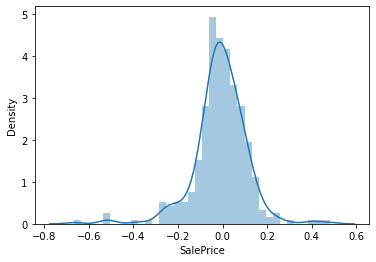

In [90]:
res=y_test-y_pred_test
sns.distplot(res)

In [91]:
coeff=list(zip(lassodouble.coef_,X_train.columns))
sorted_coeff = sorted(coeff, key=lambda x: x[0])

result=pd.DataFrame (sorted_coeff,columns=['coef_','features'])
result=result[result.coef_!=0].sort_values(by='coef_',ascending=False)

fig = px.bar(x=result.features, y=result.coef_, title="Coefficients")
fig.show()

In [92]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']       
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')
rg_metric_outlier = pd.Series(metric1, name = 'Ridge Regression double Alpha')
ls_metric_outlier = pd.Series(metric3, name = 'Lasso Regression double Alpha')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_outlier,ls_metric_outlier], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)          0.938044          0.939705   
1   R2 Score (Test)          0.899940          0.906116   
2       RSS (Train)          7.495122          7.294211   
3        RSS (Test)          5.739431          5.385180   
4       MSE (Train)          0.093301          0.092042   
5        MSE (Test)          0.124716          0.120806   

   Ridge Regression double Alpha  Lasso Regression double Alpha  
0                       0.934681                       0.938035  
1                       0.897952                       0.907937  
2                       7.902009                       7.496243  
3                       5.853464                       5.280708  
4                       0.095800                       0.093308  
5                       0.125949                       0.119628

In [93]:
coefcompare=list(zip(lassocoef,lassodoublecoef,X_train.columns))
lassocoeff=pd.DataFrame (coefcompare,columns=['coef_best_alpha','coef_double_alpha','features'])

In [94]:
coefcompare=list(zip(ridfecoeff,ridgedoublecoeff,X_train.columns))
ridgecoef=pd.DataFrame (coefcompare,columns=['coef_best_alpha','coef_double_alpha','features'])

In [95]:
lassocoeff[lassocoeff.coef_best_alpha!=0].shape

(132, 3)

In [96]:
ridgecoef[ridgecoef.coef_best_alpha!=0].shape

(160, 3)

In [97]:
lassocoeff[lassocoeff.coef_best_alpha!=0].sort_values(by="coef_best_alpha",ascending=False)

coef_best_alpha  coef_double_alpha               features
10          0.576018           0.569810              GrLivArea
2           0.440797           0.462554            OverallQual
7           0.359360           0.346739            TotalBsmtSF
3           0.304231           0.295855            OverallCond
1           0.193998           0.189853                LotArea
85          0.120654           0.095576    Exterior1st_BrkFace
17          0.112125           0.116115             GarageCars
72          0.111322           0.103906   Neighborhood_StoneBr
56          0.107143           0.105895   Neighborhood_Crawfor
8           0.096630           0.079130               2ndFlrSF
23          0.093896           0.000000               PoolArea
5           0.075598           0.079692             BsmtFinSF1
91          0.075450           0.055695     Exterior1st_Stucco
134         0.069473           0.064825         Functional_Typ
66          0.068080           0.066916   Neighborhood_NridgHt
160         0.066807           0.067840  SaleCondition_Partial
71          0.066590           0.070641   Neighborhood_Somerst
158         0.065955           0.063854   SaleCondition_Normal
95          0.064676           0.033560    Exterior2nd_Brk Cmn
4           0.055264           0.045329             MasVnrArea
128         0.053936           0.058309           CentralAir_Y
18          0.053058           0.051707             WoodDeckSF
12          0.051205           0.030811               FullBath
13          0.049732           0.040747               HalfBath
65          0.048962           0.048209   Neighborhood_NoRidge
16          0.045276           0.047609             Fireplaces
22          0.040676           0.038635            ScreenPorch
44          0.039743           0.033413            LotShape_OT
82          0.038384           0.028946            RoofMatl_OT
115         0.037934           0.037252        BsmtExposure_Gd
110         0.036253           0.030043       Foundation_PConc
94          0.035723           0.015682    Exterior1st_WdShing
104         0.034960           0.034557           ExterQual_OT
142         0.034408           0.035456          GarageQual_TA
19          0.034264           0.033831            OpenPorchSF
75          0.033769           0.034096        Condition1_Norm
24          0.031855           0.016020                MiscVal
107         0.029040           0.026303           ExterCond_TA
0           0.027065           0.016913            LotFrontage
79          0.026519           0.018441          HouseStyle_OT
109         0.026418           0.019662          Foundation_OT
89          0.025919           0.016459    Exterior1st_MetalSd
151         0.021553           0.016919               MoSold_5
54          0.021414           0.017470   Neighborhood_ClearCr
106         0.018327           0.007591           ExterCond_OT
20          0.017991           0.013247          EnclosedPorch
30          0.017129           0.009102          MSSubClass_20
114         0.016614           0.014121            BsmtCond_TA
47          0.015813           0.010048      LotConfig_CulDSac
152         0.015686           0.010595               MoSold_6
144         0.015131           0.015308           PavedDrive_Y
39          0.014258           0.002584          MSSubClass_85
138         0.014009           0.011461      GarageType_Detchd
154         0.013906           0.009035               MoSold_8
130         0.013830           0.012458       Electrical_SBrkr
86          0.013277           0.000000    Exterior1st_CemntBd
108         0.012961           0.006898      Foundation_CBlock
93          0.009256           0.000000    Exterior1st_Wd Sdng
148         0.007983           0.000000               MoSold_2
34          0.007867           0.004207          MSSubClass_50
137         0.007615           0.006178     GarageType_BuiltIn
45          0.007390           0.005005           LotShape_Reg
146         0.006757           0.000

In [98]:
X_train=X_train.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt_diff'],axis=1)
X_test=X_test.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt_diff'],axis=1)


#Fitting Lasso model by removing the top 5 features

alpha =0.0001

lassoadjusttop5 = Lasso(alpha=alpha)
        
lassoadjusttop5.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoadjusttop5.predict(X_train)
y_pred_test = lassoadjusttop5.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9218261350855994
0.8639558729433705
9.45710684743187
7.803493685740569
0.0109838639342995
0.021147679365150593


In [100]:
lassoadjustecoef=lassoadjusttop5.coef_

In [101]:
coefcompare=list(zip(lassocoef,lassodoublecoef,lassoadjustecoef,X_train.columns))
lassocoeff=pd.DataFrame (coefcompare,columns=['coef_best_alpha','coef_double_alpha','coef_ajust_features','features'])

In [102]:
lassocoeff.sort_values(by='coef_ajust_features',ascending=False)


coef_best_alpha  coef_double_alpha  coef_ajust_features  \
4           0.055264           0.045329             0.692085   
3           0.304231           0.295855             0.571760   
5           0.075598           0.079692             0.341953   
1           0.193998           0.189853             0.194572   
8           0.096630           0.079130             0.169115   
80         -0.000000           0.000000             0.166144   
78         -0.004919          -0.010075             0.156109   
13          0.049732           0.040747             0.151745   
67         -0.068849          -0.063262             0.142602   
51         -0.000000          -0.000000             0.130196   
19          0.034264           0.033831             0.115034   
123        -0.054370          -0.031527             0.103429   
9          -0.017356          -0.011375             0.085364   
153         0.001917           0.000000             0.082604   
86          0.013277           0.000000             0.082194   
12          0.051205           0.030811             0.080188   
77         -0.007226          -0.016888             0.069907   
129        -0.000000          -0.000000             0.069372   
61         -0.033603          -0.023912             0.068394   
0           0.027065           0.016913             0.067620   
20          0.017991           0.013247             0.066049   
66          0.068080           0.066916             0.065018   
14         -0.049496          -0.015770             0.059497   
137         0.007615           0.006178             0.055834   
155        -0.004886          -0.004174             0.053695   
39          0.014258           0.002584             0.046917   
18          0.053058           0.051707             0.044213   
33          0.000000           0.000000             0.042628   
2           0.440797           0.462554             0.041618   
110         0.036253           0.030043             0.040273   
99         -0.062463          -0.020847             0.038815   
81         -0.006024          -0.000000             0.036923   
42          0.000000           0.005628             0.033484   
84         -0.000000           0.000000             0.032441   
60         -0.094369          -0.069610             0.032005   
70          0.000000          -0.000000             0.031891   
15         -0.046509          -0.008507             0.031491   
63          0.000000           0.000000             0.031121   
89          0.025919           0.016459             0.030343   
74         -0.017544          -0.000000             0.030342   
35         -0.004404          -0.000000             0.028806   
38          0.000000           0.000000             0.028318   
104         0.034960           0.034557             0.027269   
109         0.026418           0.019662             0.027206   
24          0.031855           0.016020             0.023800   
139        -0.013279          -0.014569             0.023738   
88          0.000000           0.000000             0.022695   
41         -0.130776          -0.120030             0.021647   
141        -0.007629          -0.007538             0.020570   
90         -0.007520          -0.009060             0.019659   
75          0.033769           0.034096             0.017683   
31         -0.014678          -0.020334             0.016662   
105        -0.003215          -0.005198             0.015874   
142         0.034408           0.035456             0.015833   
58         -0.003366          -0.000000             0.015158   
146         0.006757           0.000000             0.015109   
125        -0.023877          -0.023816             0.014955   
114         0.016614           0.014121             0.014866   
65          0.048962           0.048209             0.013758   
140         0.000000           0.000000             0.013028   
147         0.000000          -0.000000             0.012675   
124        -0.020565          -0.0092

In [103]:
coeff=list(zip(lassoadjusttop5.coef_,X_train.columns))
sorted_coeff = sorted(coeff, key=lambda x: x[0])

result=pd.DataFrame (sorted_coeff,columns=['coef_','features'])
result=result[result.coef_!=0].sort_values(by='coef_',ascending=False)

fig = px.bar(x=result.features, y=result.coef_, title="Coefficients")
fig.show()